## Fetching World Sociodemographics Information

I'm extracting the sociodemographics data of all the countries from 1990 - 2020 in a 5-Year Interval from the IDB API.

In [1]:
import requests
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


# Modified base URL
url = (
    "https://api.census.gov/data/timeseries/idb/5year"
    "?get=NAME,GENC,group(IDB5YEAR)&YR=1990,1995,2000,2005,2010,2015,2020"
    "&for=genc+standard+countries+and+areas:*"
    "&key={YOUR_API_KEY}"
)

# Sending the GET request
response = requests.get(url)

# Check the response
if response.status_code == 200:
    try:
        # Convert the JSON response to a DataFrame
        data = response.json()
        # The first row contains headers, the rest is data
        headers, rows = data[0], data[1:]
        df = pd.DataFrame(rows, columns=headers)
    except ValueError as e:
        print("Error parsing JSON response:")
        print(response.text)
else:
    print(f"Error: {response.status_code}")
    print("Response content:")
    print(response.text)


Mounted at /content/drive


In [2]:
df

,NAME,GENC,AREA_KM2,ASFR15_19,ASFR20_24,ASFR25_29,ASFR30_34,ASFR35_39,ASFR40_44,ASFR45_49,...,POP90_94,POP95_99,POP_DENS,RNI,SEXRATIO,SRB,TFR,YR,YR,genc standard countries and areas
0,Andorra,AD,468,6.1,37.0,88.8,85.6,35.3,8.5,0.7,...,67,27,112.7,0.633,1.120,1.130,1.2940,1990,1990,AD
1,Andorra,AD,468,6.2,33.9,84.8,81.1,33.2,8.2,0.6,...,82,7,135.1,0.577,1.105,1.060,1.2314,1995,1995,AD
2,Andorra,AD,468,8.2,42.1,81.9,93.5,43.4,6.4,0.0,...,127,14,139.1,0.611,1.094,1.100,1.3733,2000,2000,AD
3,Andorra,AD,468,9.6,42.5,65.6,94.4,42.7,6.7,0.7,...,218,33,162.7,0.529,1.086,1.040,1.2960,2005,2005,AD
4,Andorra,AD,468,12.3,41.8,72.9,88.7,40.5,13.2,0.7,...,310,74,180.7,0.414,1.071,1.060,1.3391,2010,2010,AD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,Zimbabwe,ZW,386847,107.7,201.0,177.3,138.0,100.7,44.7,14.3,...,4474,620,31.8,1.749,0.982,1.030,3.9183,2000,2000,ZW
1585,Zimbabwe,ZW,386847,101.7,206.2,175.7,144.8,89.0,40.8,12.8,...,5636,831,34.0,1.811,0.982,1.030,3.8550,2005,2005,ZW
1586,Zimbabwe,ZW,386847,115.0,212.0,194.0,149.0,104.0,35.0,12.0,...,6960,1056,34.2,2.467,0.950,1.030,4.1050,2010,2010,ZW
1587,Zimbabwe,ZW,386847,105.6,197.4,196.4,144.8,99.6,33.0,5.9,...,7873,1212,36.4,2.549,0.934,1.030,3.9133,2015,2015,ZW


There are 120 columns in this dataframe. However, we don't need all of them as of yet. Hence, we will only extract the ones that are relevant to us. If I do find them to be relevant later on, I will add them again.

In [3]:
# Print all column names
print(list(df.columns))

['NAME', 'GENC', 'AREA_KM2', 'ASFR15_19', 'ASFR20_24', 'ASFR25_29', 'ASFR30_34', 'ASFR35_39', 'ASFR40_44', 'ASFR45_49', 'BIRTHS', 'BIRTHS15_19', 'BIRTHS20_24', 'BIRTHS25_29', 'BIRTHS30_34', 'BIRTHS35_39', 'BIRTHS40_44', 'BIRTHS45_49', 'CBR', 'CDR', 'DEATHS', 'DEPND', 'DEPND0_14', 'DEPND65_', 'E0', 'E0_F', 'E0_M', 'FMR0_4', 'FMR1_4', 'FPOP', 'FPOP0_4', 'FPOP100_', 'FPOP10_14', 'FPOP15_19', 'FPOP20_24', 'FPOP25_29', 'FPOP30_34', 'FPOP35_39', 'FPOP40_44', 'FPOP45_49', 'FPOP50_54', 'FPOP55_59', 'FPOP5_9', 'FPOP60_64', 'FPOP65_69', 'FPOP70_74', 'FPOP75_79', 'FPOP80_84', 'FPOP85_89', 'FPOP90_94', 'FPOP95_99', 'GEO_ID', 'NAME', 'GR', 'GRR', 'IMR', 'IMR_F', 'IMR_M', 'MEDAGE', 'MEDAGE_F', 'MEDAGE_M', 'MMR0_4', 'MMR1_4', 'MPOP', 'MPOP0_4', 'MPOP100_', 'MPOP10_14', 'MPOP15_19', 'MPOP20_24', 'MPOP25_29', 'MPOP30_34', 'MPOP35_39', 'MPOP40_44', 'MPOP45_49', 'MPOP50_54', 'MPOP55_59', 'MPOP5_9', 'MPOP60_64', 'MPOP65_69', 'MPOP70_74', 'MPOP75_79', 'MPOP80_84', 'MPOP85_89', 'MPOP90_94', 'MPOP95_99', 'MR

In [4]:
# List of relevant columns
relevant_columns = [
    'NAME',         # Country name
    'YR',           # Year
    'POP',          # Population
    'GR',           # Annual Growth Rate
    'AREA_KM2',     # Area in Square Kilometers
    'POP_DENS',     # Density (People per Sq Km)
    'TFR',          # Total Fertility Rate
    'CBR',          # Crude Birth Rate
    'E0',           # Life Expectancy at Birth
    'IMR',          # Infant Mortality Rate
    'CDR',          # Crude Death Rate
    'NMR',          # Net Migration Rate
    'GENC'
]

# Filter the DataFrame
demo_df = df[relevant_columns]

# Display the filtered DataFrame
demo_df


,NAME,NAME,YR,YR,POP,GR,AREA_KM2,POP_DENS,TFR,CBR,E0,IMR,CDR,NMR,GENC
0,Andorra,Andorra,1990,1990,52747,6.275,468,112.7,1.2940,11.91,79.48,5.85,5.57,56.42,AD
1,Andorra,Andorra,1995,1995,63245,-0.590,468,135.1,1.2314,11.10,79.20,6.26,5.33,-11.67,AD
2,Andorra,Andorra,2000,2000,65099,-0.123,468,139.1,1.3733,11.47,80.96,4.85,5.36,-7.34,AD
3,Andorra,Andorra,2005,2005,76122,2.086,468,162.7,1.2960,10.88,81.86,4.23,5.58,15.57,AD
4,Andorra,Andorra,2010,2010,84563,0.414,468,180.7,1.3391,10.03,82.88,3.60,5.89,0.00,AD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,Zimbabwe,Zimbabwe,2000,2000,12314150,1.620,386847,31.8,3.9183,32.87,46.50,51.97,15.38,-1.29,ZW
1585,Zimbabwe,Zimbabwe,2005,2005,13165551,-0.235,386847,34.0,3.8550,33.91,46.36,53.67,15.80,-20.47,ZW
1586,Zimbabwe,Zimbabwe,2010,2010,13222536,0.440,386847,34.2,4.1050,36.45,54.86,51.36,11.79,-20.26,ZW
1587,Zimbabwe,Zimbabwe,2015,2015,14072188,1.944,386847,36.4,3.9133,34.32,62.00,42.18,8.83,-6.05,ZW


## Fetching Migration Data.

I will use the Migration Data from the United Nations' International Migrant Stock 2020 Database. This has migration data from 234 countries for every 5 years (1990-2020).

In [5]:
migration_df = pd.read_csv("/content/drive/MyDrive/Machine-Learning/MigrationData.csv")
migration_df

,Index,Year,"Region, development group, country or area",Notes,Location code,Type of data,0-4,5-9,10-14,15-19,...,35-39.2,40-44.2,45-49.2,50-54.2,55-59.2,60-64.2,65-69.2,70-74.2,75+.2,Total.2
0,1,1990,WORLD,NaN,900,NaN,4 940 094,6 508 813,7 870 896,9 631 753,...,6 866 805,6 216 888,5 213 839,4 428 584,3 978 529,3 691 290,2 973 005,2 548 763,4 928 529,75 422 690
1,2,1995,WORLD,NaN,900,NaN,4 683 966,6 256 492,7 690 520,9 453 166,...,7 548 080,6 816 854,5 911 764,4 995 075,4 287 775,3 823 263,3 119 032,2 864 763,5 080 075,79 708 475
2,3,2000,WORLD,NaN,900,NaN,4 726 060,6 151 369,7 603 830,9 578 087,...,8 255 608,7 540 512,6 559 199,5 758 957,4 686 452,4 172 300,3 326 001,3 119 934,5 690 722,85 510 752
3,4,2005,WORLD,NaN,900,NaN,4 912 830,6 562 128,8 100 234,10 652 190,...,8 907 407,8 233 674,7 377 669,6 499 130,5 514 576,4 567 244,3 706 760,3 278 077,5 868 837,93 783 747
4,5,2010,WORLD,NaN,900,NaN,5 772 791,7 338 510,8 458 240,11 057 021,...,10 181 838,9 371 840,8 598 912,7 543 434,6 445 198,5 557 592,4 217 541,3 623 915,6 527 536,107 042 306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,1977,2000,Wallis and Futuna Islands*,42,876,B R,140,221,220,188,...,78,60,48,40,41,8,8,5,0,997
1977,1978,2005,Wallis and Futuna Islands*,42,876,B R,146,229,226,163,...,92,75,60,53,52,12,13,6,1,1 084
1978,1979,2010,Wallis and Futuna Islands*,42,876,B R,139,214,193,156,...,105,100,87,69,58,22,15,7,4,1 045
1979,1980,2015,Wallis and Futuna Islands*,42,876,B R,135,203,165,151,...,119,122,109,82,63,32,17,9,8,1 015


In [6]:
len(migration_df)

1981

In [7]:
print(list(migration_df.columns))

['Index', 'Year', 'Region, development group, country or area', 'Notes', 'Location code', 'Type of data', '0-4', '5-9', '10-14', ' 15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+', 'Total', '0-4.1', '5-9.1', '10-14.1', ' 15-19.1', '20-24.1', '25-29.1', '30-34.1', '35-39.1', '40-44.1', '45-49.1', '50-54.1', '55-59.1', '60-64.1', '65-69.1', '70-74.1', '75+.1', 'Total.1', '0-4.2', '5-9.2', '10-14.2', ' 15-19.2', '20-24.2', '25-29.2', '30-34.2', '35-39.2', '40-44.2', '45-49.2', '50-54.2', '55-59.2', '60-64.2', '65-69.2', '70-74.2', '75+.2', 'Total.2']


## Fetching Country Codes.

I am using a GitHub Repo of lukes which has curated a list of all countries with their International ISO codes. This will help me combine the Demographics data and the Migration Data.

Link: https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv

In [8]:
url = "https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/refs/heads/master/all/all.csv"

country_codes = pd.read_csv(url)
country_codes

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


## Data Cleaning

### Cleaning Migration Data

In [9]:
# Replace empty strings or specific placeholders with NaN
migration_df.replace(["", "NaN", "NULL"], pd.NA, inplace=True)

In [10]:
migration_df.isna().sum()

,0
Index,0
Year,0
"Region, development group, country or area",0
Notes,1694
Location code,0
Type of data,357
0-4,0
5-9,0
10-14,0
15-19,0


From the data preview above, it's obvious that Regions which are not a country have a `Type of Data` column value as `NaN`. Additionally, the data is structured in such a way that Individual Countries are categorized under regions. The first couple of rows of data are all grouped and summarized into specific regions such as `World`, `Developed Regions`, `Less Developed Regions`, and much more.

Since, I am only interested in Individual Countries, I will remove these rows.

In [11]:
# Filter rows where 'Type of data' column is not NaN
filtered_data = migration_df[migration_df['Type of data'].notna()]

# Display the first few rows of the filtered dataset
filtered_data.head()

,Index,Year,"Region, development group, country or area",Notes,Location code,Type of data,0-4,5-9,10-14,15-19,...,35-39.2,40-44.2,45-49.2,50-54.2,55-59.2,60-64.2,65-69.2,70-74.2,75+.2,Total.2
161,162,1990,Burundi,NaN,108,B R,22 459,23 463,20 802,20 214,...,17 664,13 317,9 707,7 656,5 518,4 799,3 794,1 517,2 290,169 843
162,163,1995,Burundi,NaN,108,B R,17 183,17 951,15 915,15 465,...,13 593,10 247,7 469,5 891,4 245,3 692,2 920,1 167,1 761,130 688
163,164,2000,Burundi,NaN,108,B R,5 969,9 365,10 078,10 609,...,6 276,4 850,3 822,2 602,2 465,1 636,1 383,1 277,776,64 534
164,165,2005,Burundi,NaN,108,B R,23 314,15 343,18 719,14 936,...,8 428,7 065,5 572,3 891,3 051,2 145,1 778,1 532,1 085,98 361
165,166,2010,Burundi,NaN,108,B R,29 503,16 917,13 353,18 361,...,11 074,10 196,8 739,6 819,4 888,3 485,2 424,1 792,2 068,125 559


In [12]:
filtered_data.isna().sum()

,0
Index,0
Year,0
"Region, development group, country or area",0
Notes,1337
Location code,0
Type of data,0
0-4,0
5-9,0
10-14,0
15-19,0


Let's also clean the columns of this dataset. There is an `unamed` column along with an `index` column which is redundant. The `Notes` column is redundant.
The rest of the columns is Migration Data based on Age Groups. It starts from 0-4 and ends at Total. This first set is of all Sexes combined. After that the next of `0-4.1` to `Total.1` is of Male Migrants. And Lastly, the last set of `0-4.2` to `Total.2` is of Female Migrants.

In [13]:
# Ensure all column names are strings
filtered_data.columns = filtered_data.columns.map(str)

# Drop redundant columns: 'Index', 'Notes', and unnamed columns
filtered_data = filtered_data.loc[:, ~filtered_data.columns.str.contains('^Unnamed', na=False)]
filtered_data.drop(columns=['Index', 'Notes'], errors='ignore', inplace=True)

# Rename relevant columns for clarity
filtered_data.rename(
    columns={
        '0-4': 'AllSexes_0-4', 'Total': 'AllSexes_Total',
        '0-4.1': 'Male_0-4', 'Total.1': 'Male_Total',
        '0-4.2': 'Female_0-4', 'Total.2': 'Female_Total'
    },
    inplace=True
)

# Display the cleaned column names and the first few rows
cleaned_columns = filtered_data.columns

In [14]:
# Reset the index to remove the unnamed serial number column
filtered_data.reset_index(drop=True, inplace=True)

# Rename columns for consistency and clarity, grouping them into AllSexes, Male, and Female
filtered_data.rename(
    columns={
        '5-9': 'AllSexes_5-9', '10-14': 'AllSexes_10-14', ' 15-19': 'AllSexes_15-19',
        '20-24': 'AllSexes_20-24', '25-29': 'AllSexes_25-29', '30-34': 'AllSexes_30-34',
        '35-39': 'AllSexes_35-39', '40-44': 'AllSexes_40-44', '45-49': 'AllSexes_45-49',
        '50-54': 'AllSexes_50-54', '55-59': 'AllSexes_55-59', '60-64': 'AllSexes_60-64',
        '65-69': 'AllSexes_65-69', '70-74': 'AllSexes_70-74', '75+': 'AllSexes_75+',
        '5-9.1': 'Male_5-9', '10-14.1': 'Male_10-14', ' 15-19.1': 'Male_15-19',
        '20-24.1': 'Male_20-24', '25-29.1': 'Male_25-29', '30-34.1': 'Male_30-34',
        '35-39.1': 'Male_35-39', '40-44.1': 'Male_40-44', '45-49.1': 'Male_45-49',
        '50-54.1': 'Male_50-54', '55-59.1': 'Male_55-59', '60-64.1': 'Male_60-64',
        '65-69.1': 'Male_65-69', '70-74.1': 'Male_70-74', '75+.1': 'Male_75+',
        '5-9.2': 'Female_5-9', '10-14.2': 'Female_10-14', ' 15-19.2': 'Female_15-19',
        '20-24.2': 'Female_20-24', '25-29.2': 'Female_25-29', '30-34.2': 'Female_30-34',
        '35-39.2': 'Female_35-39', '40-44.2': 'Female_40-44', '45-49.2': 'Female_45-49',
        '50-54.2': 'Female_50-54', '55-59.2': 'Female_55-59', '60-64.2': 'Female_60-64',
        '65-69.2': 'Female_65-69', '70-74.2': 'Female_70-74', '75+.2': 'Female_75+'
    },
    inplace=True
)

# Display the cleaned column names to verify the changes
filtered_data.columns.tolist()

['Year',
 'Region, development group, country or area',
 'Location code',
 'Type of data',
 'AllSexes_0-4',
 'AllSexes_5-9',
 'AllSexes_10-14',
 'AllSexes_15-19',
 'AllSexes_20-24',
 'AllSexes_25-29',
 'AllSexes_30-34',
 'AllSexes_35-39',
 'AllSexes_40-44',
 'AllSexes_45-49',
 'AllSexes_50-54',
 'AllSexes_55-59',
 'AllSexes_60-64',
 'AllSexes_65-69',
 'AllSexes_70-74',
 'AllSexes_75+',
 'AllSexes_Total',
 'Male_0-4',
 'Male_5-9',
 'Male_10-14',
 'Male_15-19',
 'Male_20-24',
 'Male_25-29',
 'Male_30-34',
 'Male_35-39',
 'Male_40-44',
 'Male_45-49',
 'Male_50-54',
 'Male_55-59',
 'Male_60-64',
 'Male_65-69',
 'Male_70-74',
 'Male_75+',
 'Male_Total',
 'Female_0-4',
 'Female_5-9',
 'Female_10-14',
 'Female_15-19',
 'Female_20-24',
 'Female_25-29',
 'Female_30-34',
 'Female_35-39',
 'Female_40-44',
 'Female_45-49',
 'Female_50-54',
 'Female_55-59',
 'Female_60-64',
 'Female_65-69',
 'Female_70-74',
 'Female_75+',
 'Female_Total']

In [15]:
migration_df = filtered_data

The "Type of data" column in the dataset indicates the methodology used to derive migration estimates for each country or region. The values in this column consist of one or more codes:

* B: Derived from data on the foreign-born population.
* C: Derived from data on foreign citizens.
* R: Includes refugees/displaced persons, asylum seekers, or displaced populations as reported by UNHCR or UNRWA.
* I: Imputed estimates where no direct data on international migrants was available.
To enhance interpretability:

A new column, "Type of data (description)", was created to translate the codes into human-readable descriptions (e.g., C B R → "Foreign citizens, Foreign-born population, Refugees/displaced persons").
Binary indicator columns were added for each code (Foreign-born population, Foreign citizens, Refugees/displaced persons, Imputed estimates) to allow for filtering and analysis

In [16]:
# Create a mapping of codes to descriptions
code_descriptions = {
    'B': 'Foreign-born population',
    'C': 'Foreign citizens',
    'R': 'Refugees/displaced persons',
    'I': 'Imputed estimates'
}

# Translate "Type of data" column into a descriptive format
def translate_type_of_data(value):
    codes = value.split()  # Split the string into individual codes
    descriptions = [code_descriptions[code] for code in codes if code in code_descriptions]
    return ", ".join(descriptions)  # Combine descriptions into a single string

# Apply the transformation to the "Type of data" column
migration_df['Type of data (description)'] = migration_df['Type of data'].apply(translate_type_of_data)

# Create binary indicator columns for each code
for code, description in code_descriptions.items():
    migration_df[description] = migration_df['Type of data'].str.contains(code).astype(int)

# Display the transformed dataset
migration_df

,Year,"Region, development group, country or area",Location code,Type of data,AllSexes_0-4,AllSexes_5-9,AllSexes_10-14,AllSexes_15-19,AllSexes_20-24,AllSexes_25-29,...,Female_60-64,Female_65-69,Female_70-74,Female_75+,Female_Total,Type of data (description),Foreign-born population,Foreign citizens,Refugees/displaced persons,Imputed estimates
0,1990,Burundi,108,B R,22 459,23 463,20 802,20 214,27 170,38 450,...,4 799,3 794,1 517,2 290,169 843,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
1,1995,Burundi,108,B R,17 183,17 951,15 915,15 465,20 787,29 417,...,3 692,2 920,1 167,1 761,130 688,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
2,2000,Burundi,108,B R,5 969,9 365,10 078,10 609,12 492,13 617,...,1 636,1 383,1 277,776,64 534,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
3,2005,Burundi,108,B R,23 314,15 343,18 719,14 936,13 975,17 104,...,2 145,1 778,1 532,1 085,98 361,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
4,2010,Burundi,108,B R,29 503,16 917,13 353,18 361,19 854,21 673,...,3 485,2 424,1 792,2 068,125 559,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,2000,Wallis and Futuna Islands*,876,B R,140,221,220,188,214,216,...,8,8,5,0,997,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
1620,2005,Wallis and Futuna Islands*,876,B R,146,229,226,163,210,228,...,12,13,6,1,1 084,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
1621,2010,Wallis and Futuna Islands*,876,B R,139,214,193,156,132,143,...,22,15,7,4,1 045,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
1622,2015,Wallis and Futuna Islands*,876,B R,135,203,165,151,61,66,...,32,17,9,8,1 015,"Foreign-born population, Refugees/displaced pe...",1,0,1,0


Renaming the `Region, development group, country or area': 'Country` to simply `Country`.

In [17]:
# Rename the column to "Country" for simplicity
migration_df.rename(columns={'Region, development group, country or area': 'Country'}, inplace=True)

# Display the updated column names to confirm the change
migration_df


,Year,Country,Location code,Type of data,AllSexes_0-4,AllSexes_5-9,AllSexes_10-14,AllSexes_15-19,AllSexes_20-24,AllSexes_25-29,...,Female_60-64,Female_65-69,Female_70-74,Female_75+,Female_Total,Type of data (description),Foreign-born population,Foreign citizens,Refugees/displaced persons,Imputed estimates
0,1990,Burundi,108,B R,22 459,23 463,20 802,20 214,27 170,38 450,...,4 799,3 794,1 517,2 290,169 843,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
1,1995,Burundi,108,B R,17 183,17 951,15 915,15 465,20 787,29 417,...,3 692,2 920,1 167,1 761,130 688,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
2,2000,Burundi,108,B R,5 969,9 365,10 078,10 609,12 492,13 617,...,1 636,1 383,1 277,776,64 534,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
3,2005,Burundi,108,B R,23 314,15 343,18 719,14 936,13 975,17 104,...,2 145,1 778,1 532,1 085,98 361,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
4,2010,Burundi,108,B R,29 503,16 917,13 353,18 361,19 854,21 673,...,3 485,2 424,1 792,2 068,125 559,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,2000,Wallis and Futuna Islands*,876,B R,140,221,220,188,214,216,...,8,8,5,0,997,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
1620,2005,Wallis and Futuna Islands*,876,B R,146,229,226,163,210,228,...,12,13,6,1,1 084,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
1621,2010,Wallis and Futuna Islands*,876,B R,139,214,193,156,132,143,...,22,15,7,4,1 045,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
1622,2015,Wallis and Futuna Islands*,876,B R,135,203,165,151,61,66,...,32,17,9,8,1 015,"Foreign-born population, Refugees/displaced pe...",1,0,1,0


In [18]:
migration_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Year                        1624 non-null   int64 
 1   Country                     1624 non-null   object
 2   Location code               1624 non-null   int64 
 3   Type of data                1624 non-null   object
 4   AllSexes_0-4                1624 non-null   object
 5   AllSexes_5-9                1624 non-null   object
 6   AllSexes_10-14              1624 non-null   object
 7   AllSexes_15-19              1624 non-null   object
 8   AllSexes_20-24              1624 non-null   object
 9   AllSexes_25-29              1624 non-null   object
 10  AllSexes_30-34              1624 non-null   object
 11  AllSexes_35-39              1624 non-null   object
 12  AllSexes_40-44              1624 non-null   object
 13  AllSexes_45-49              1624 non-null   obje

All the columns which have the count of Migration across different age groups are of a String Type.

To convert them into a numerical data type, I'll first replace the `..` values which indicate missing values in the data with NA and then convert the rest of the values to numeric data type.

In [19]:
import numpy as np

# Identify columns that should be numeric
numeric_columns = [
    col for col in migration_df.columns
    if any(keyword in col for keyword in ['AllSexes', 'Male', 'Female']) and col != 'Type of data (description)'
]

# Clean and convert the columns
for col in numeric_columns:
    migration_df[col] = (
        migration_df[col].astype(str)  # Ensure values are strings
        .str.replace(' ', '', regex=True)  # Remove spaces
        .replace('..', np.nan)  # Replace invalid entries with NaN
        .astype(float)  # Convert to numeric
    )

# Verify changes by checking the data types and sample rows
migration_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        1624 non-null   int64  
 1   Country                     1624 non-null   object 
 2   Location code               1624 non-null   int64  
 3   Type of data                1624 non-null   object 
 4   AllSexes_0-4                1588 non-null   float64
 5   AllSexes_5-9                1588 non-null   float64
 6   AllSexes_10-14              1588 non-null   float64
 7   AllSexes_15-19              1588 non-null   float64
 8   AllSexes_20-24              1588 non-null   float64
 9   AllSexes_25-29              1588 non-null   float64
 10  AllSexes_30-34              1588 non-null   float64
 11  AllSexes_35-39              1588 non-null   float64
 12  AllSexes_40-44              1588 non-null   float64
 13  AllSexes_45-49              1588 

This step converted the columns to numeric type, however, it highlights some more missing data in our migration data.

In [20]:
migration_df.isna().sum()

,0
Year,0
Country,0
Location code,0
Type of data,0
AllSexes_0-4,36
AllSexes_5-9,36
AllSexes_10-14,36
AllSexes_15-19,36
AllSexes_20-24,36
AllSexes_25-29,36


In [21]:
# Identify rows with missing values in any of the numeric columns
missing_rows = migration_df[migration_df[numeric_columns].isna().any(axis=1)]

# Display rows with missing values
missing_rows

,Year,Country,Location code,Type of data,AllSexes_0-4,AllSexes_5-9,AllSexes_10-14,AllSexes_15-19,AllSexes_20-24,AllSexes_25-29,...,Female_60-64,Female_65-69,Female_70-74,Female_75+,Female_Total,Type of data (description),Foreign-born population,Foreign citizens,Refugees/displaced persons,Imputed estimates
105,1990,South Sudan,728,B R,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
106,1995,South Sudan,728,B R,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
107,2000,South Sudan,728,B R,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
108,2005,South Sudan,728,B R,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
378,1990,Saint Helena*,654,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,68.0,Foreign citizens,0,1,0,0
379,1995,Saint Helena*,654,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,47.0,Foreign citizens,0,1,0,0
380,2000,Saint Helena*,654,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,47.0,Foreign citizens,0,1,0,0
381,2005,Saint Helena*,654,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78.0,Foreign citizens,0,1,0,0
382,2010,Saint Helena*,654,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,112.0,Foreign citizens,0,1,0,0
383,2015,Saint Helena*,654,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,126.0,Foreign citizens,0,1,0,0


So, there are certain Countries where there is no breakdown of migrants across different age groups but do have the Total Migrant counts seperated by Sex as well.

In [22]:
# Separate rows based on whether 'AllSexes_Total', 'Male_Total', and 'Female_Total' are NaN or not
total_cols = ['AllSexes_Total', 'Male_Total', 'Female_Total']

# Rows where all totals are not NaN
non_missing_totals_df = missing_rows[missing_rows[total_cols].notna().all(axis=1)]

# Rows where any total is NaN
missing_totals_df = missing_rows[missing_rows[total_cols].isna().any(axis=1)]

# Display counts for each DataFrame
non_missing_count = non_missing_totals_df.shape[0]
missing_count = missing_totals_df.shape[0]


In [23]:
non_missing_totals_df[['AllSexes_Total', 'Male_Total', 'Female_Total', 'Country', 'Year']]

,AllSexes_Total,Male_Total,Female_Total,Country,Year
378,178.0,110.0,68.0,Saint Helena*,1990
379,117.0,70.0,47.0,Saint Helena*,1995
380,108.0,61.0,47.0,Saint Helena*,2000
381,163.0,85.0,78.0,Saint Helena*,2005
382,248.0,136.0,112.0,Saint Helena*,2010
383,377.0,251.0,126.0,Saint Helena*,2015
384,437.0,306.0,131.0,Saint Helena*,2020
959,762.0,376.0,386.0,Holy See*,1990
960,778.0,379.0,399.0,Holy See*,1995
961,790.0,379.0,411.0,Holy See*,2000


In [24]:
missing_totals_df

,Year,Country,Location code,Type of data,AllSexes_0-4,AllSexes_5-9,AllSexes_10-14,AllSexes_15-19,AllSexes_20-24,AllSexes_25-29,...,Female_60-64,Female_65-69,Female_70-74,Female_75+,Female_Total,Type of data (description),Foreign-born population,Foreign citizens,Refugees/displaced persons,Imputed estimates
105,1990,South Sudan,728,B R,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
106,1995,South Sudan,728,B R,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
107,2000,South Sudan,728,B R,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
108,2005,South Sudan,728,B R,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
980,1990,Montenegro,499,B,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Foreign-born population,1,0,0,0
981,1995,Montenegro,499,B,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Foreign-born population,1,0,0,0
982,2000,Montenegro,499,B,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Foreign-born population,1,0,0,0
983,2005,Montenegro,499,B,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Foreign-born population,1,0,0,0
1127,1990,"Bonaire, Sint Eustatius and Saba*",535,B,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Foreign-born population,1,0,0,0
1128,1995,"Bonaire, Sint Eustatius and Saba*",535,B,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Foreign-born population,1,0,0,0


According to the `Notes` section of the data, they mention that the data of South Sudan and Sudan is the same from 1990 to 2005. Hence, I replaced the missing values in South Sudan with the respective yearly values of Sudan.

In [25]:
# Clean the 'Country' column by stripping whitespace and normalizing
migration_df['Country'] = migration_df['Country'].str.strip()

# Define the years of interest
years_to_replace = [1990, 1995, 2000, 2005]

# Loop through each year and replace NaN values for 'South Sudan' with corresponding values from 'Sudan'
for year in years_to_replace:
    # Get the values for Sudan for the specific year
    sudan_values = migration_df.loc[
        (migration_df['Country'] == 'Sudan') & (migration_df['Year'] == year)
    ]

    # Check if values exist for Sudan
    if not sudan_values.empty:
        # Replace NaN values in 'South Sudan' for the same year
        migration_df.loc[
            (migration_df['Country'] == 'South Sudan') & (migration_df['Year'] == year)
        ] = migration_df.loc[
            (migration_df['Country'] == 'South Sudan') & (migration_df['Year'] == year)
        ].fillna(sudan_values.iloc[0])

# Display the updated DataFrame for verification
south_sudan_updated = migration_df[migration_df['Country'] == 'South Sudan']

In [26]:
south_sudan_updated

,Year,Country,Location code,Type of data,AllSexes_0-4,AllSexes_5-9,AllSexes_10-14,AllSexes_15-19,AllSexes_20-24,AllSexes_25-29,...,Female_60-64,Female_65-69,Female_70-74,Female_75+,Female_Total,Type of data (description),Foreign-born population,Foreign citizens,Refugees/displaced persons,Imputed estimates
105,1990,South Sudan,728,B R,180557.0,212836.0,142743.0,138691.0,116907.0,96283.0,...,35109.0,8671.0,7190.0,8029.0,706511.0,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
106,1995,South Sudan,728,B R,128258.0,139723.0,126293.0,99958.0,90782.0,75720.0,...,24371.0,13707.0,6501.0,5111.0,527695.0,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
107,2000,South Sudan,728,B R,92939.0,97093.0,96382.0,81974.0,69108.0,60326.0,...,16785.0,12398.0,8177.0,4123.0,400468.0,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
108,2005,South Sudan,728,B R,59628.0,60960.0,62065.0,57214.0,48465.0,41520.0,...,10060.0,9911.0,7178.0,3904.0,268335.0,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
109,2010,South Sudan,728,B R,22071.0,24655.0,23077.0,24163.0,22680.0,20821.0,...,2907.0,1588.0,1066.0,1203.0,111626.0,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
110,2015,South Sudan,728,B R,67165.0,73397.0,74296.0,75658.0,80467.0,84154.0,...,11154.0,5763.0,3921.0,4385.0,413168.0,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
111,2020,South Sudan,728,B R,70199.0,76713.0,77652.0,79076.0,84102.0,87956.0,...,11847.0,6121.0,4164.0,4660.0,438847.0,"Foreign-born population, Refugees/displaced pe...",1,0,1,0


In [27]:
print(list(migration_df.columns))

['Year', 'Country', 'Location code', 'Type of data', 'AllSexes_0-4', 'AllSexes_5-9', 'AllSexes_10-14', 'AllSexes_15-19', 'AllSexes_20-24', 'AllSexes_25-29', 'AllSexes_30-34', 'AllSexes_35-39', 'AllSexes_40-44', 'AllSexes_45-49', 'AllSexes_50-54', 'AllSexes_55-59', 'AllSexes_60-64', 'AllSexes_65-69', 'AllSexes_70-74', 'AllSexes_75+', 'AllSexes_Total', 'Male_0-4', 'Male_5-9', 'Male_10-14', 'Male_15-19', 'Male_20-24', 'Male_25-29', 'Male_30-34', 'Male_35-39', 'Male_40-44', 'Male_45-49', 'Male_50-54', 'Male_55-59', 'Male_60-64', 'Male_65-69', 'Male_70-74', 'Male_75+', 'Male_Total', 'Female_0-4', 'Female_5-9', 'Female_10-14', 'Female_15-19', 'Female_20-24', 'Female_25-29', 'Female_30-34', 'Female_35-39', 'Female_40-44', 'Female_45-49', 'Female_50-54', 'Female_55-59', 'Female_60-64', 'Female_65-69', 'Female_70-74', 'Female_75+', 'Female_Total', 'Type of data (description)', 'Foreign-born population', 'Foreign citizens', 'Refugees/displaced persons', 'Imputed estimates']


Rest of countries' missing values are replaced by other countries' proportions that adds up to the respective totals of `AllSexes_Total`, `Male_Total`, `Female_Total`.

In [28]:
import numpy as np

# Define the age group columns for all sexes, male, and female
age_group_columns_all = [col for col in migration_df.columns if 'AllSexes_' in col and 'Total' not in col]
age_group_columns_male = [col for col in migration_df.columns if 'Male_' in col and 'Total' not in col]
age_group_columns_female = [col for col in migration_df.columns if 'Female_' in col and 'Total' not in col]

# Filter rows for other countries where age group data is available
age_group_data = migration_df[~migration_df[age_group_columns_all].isnull().all(axis=1)]

# Calculate the average proportions of each age group relative to the total
proportions_all = age_group_data[age_group_columns_all].div(
    age_group_data['AllSexes_Total'], axis=0
).mean()

proportions_male = age_group_data[age_group_columns_male].div(
    age_group_data['Male_Total'], axis=0
).mean()

proportions_female = age_group_data[age_group_columns_female].div(
    age_group_data['Female_Total'], axis=0
).mean()

# Replace missing values for 'Saint Helena' using the calculated proportions, rounded down
saint_helena_filter = migration_df['Country'] == 'Saint Helena*'

for col in age_group_columns_all:
    migration_df.loc[saint_helena_filter, col] = np.floor(
        migration_df.loc[saint_helena_filter, 'AllSexes_Total'] * proportions_all[col]
    )

for col in age_group_columns_male:
    migration_df.loc[saint_helena_filter, col] = np.floor(
        migration_df.loc[saint_helena_filter, 'Male_Total'] * proportions_male[col]
    )

for col in age_group_columns_female:
    migration_df.loc[saint_helena_filter, col] = np.floor(
        migration_df.loc[saint_helena_filter, 'Female_Total'] * proportions_female[col]
    )

# Display the updated rows for 'Saint Helena'
updated_saint_helena = migration_df[saint_helena_filter]

In [29]:
updated_saint_helena

,Year,Country,Location code,Type of data,AllSexes_0-4,AllSexes_5-9,AllSexes_10-14,AllSexes_15-19,AllSexes_20-24,AllSexes_25-29,...,Female_60-64,Female_65-69,Female_70-74,Female_75+,Female_Total,Type of data (description),Foreign-born population,Foreign citizens,Refugees/displaced persons,Imputed estimates
378,1990,Saint Helena*,654,C,9.0,10.0,10.0,11.0,14.0,17.0,...,2.0,2.0,1.0,2.0,68.0,Foreign citizens,0,1,0,0
379,1995,Saint Helena*,654,C,6.0,6.0,6.0,7.0,9.0,11.0,...,1.0,1.0,1.0,1.0,47.0,Foreign citizens,0,1,0,0
380,2000,Saint Helena*,654,C,5.0,6.0,6.0,7.0,8.0,10.0,...,1.0,1.0,1.0,1.0,47.0,Foreign citizens,0,1,0,0
381,2005,Saint Helena*,654,C,8.0,9.0,9.0,10.0,13.0,16.0,...,3.0,2.0,1.0,3.0,78.0,Foreign citizens,0,1,0,0
382,2010,Saint Helena*,654,C,12.0,14.0,14.0,16.0,20.0,24.0,...,4.0,3.0,2.0,4.0,112.0,Foreign citizens,0,1,0,0
383,2015,Saint Helena*,654,C,19.0,21.0,22.0,24.0,31.0,37.0,...,4.0,3.0,3.0,5.0,126.0,Foreign citizens,0,1,0,0
384,2020,Saint Helena*,654,C,22.0,24.0,25.0,28.0,36.0,43.0,...,5.0,4.0,3.0,5.0,131.0,Foreign citizens,0,1,0,0


In [30]:
# Clean the 'Country' column by removing any trailing '*'
migration_df['Country'] = migration_df['Country'].str.replace(r'\*$', '', regex=True)

# Reapply the logic for 'Holy See'
holy_see_filter = migration_df['Country'] == 'Holy See'

for col in age_group_columns_all:
    migration_df.loc[holy_see_filter, col] = np.floor(
        migration_df.loc[holy_see_filter, 'AllSexes_Total'] * proportions_all[col]
    )

for col in age_group_columns_male:
    migration_df.loc[holy_see_filter, col] = np.floor(
        migration_df.loc[holy_see_filter, 'Male_Total'] * proportions_male[col]
    )

for col in age_group_columns_female:
    migration_df.loc[holy_see_filter, col] = np.floor(
        migration_df.loc[holy_see_filter, 'Female_Total'] * proportions_female[col]
    )

# Display the updated rows for 'Holy See'
updated_holy_see = migration_df[holy_see_filter]
updated_holy_see

,Year,Country,Location code,Type of data,AllSexes_0-4,AllSexes_5-9,AllSexes_10-14,AllSexes_15-19,AllSexes_20-24,AllSexes_25-29,...,Female_60-64,Female_65-69,Female_70-74,Female_75+,Female_Total,Type of data (description),Foreign-born population,Foreign citizens,Refugees/displaced persons,Imputed estimates
959,1990,Holy See,336,I,39.0,43.0,45.0,49.0,63.0,75.0,...,14.0,11.0,9.0,16.0,386.0,Imputed estimates,0,0,0,1
960,1995,Holy See,336,I,40.0,44.0,45.0,50.0,64.0,76.0,...,15.0,12.0,10.0,16.0,399.0,Imputed estimates,0,0,0,1
961,2000,Holy See,336,I,41.0,45.0,46.0,51.0,65.0,77.0,...,15.0,12.0,10.0,17.0,411.0,Imputed estimates,0,0,0,1
962,2005,Holy See,336,I,41.0,45.0,47.0,52.0,66.0,78.0,...,16.0,12.0,10.0,17.0,417.0,Imputed estimates,0,0,0,1
963,2010,Holy See,336,I,41.0,44.0,46.0,51.0,64.0,77.0,...,15.0,12.0,10.0,17.0,408.0,Imputed estimates,0,0,0,1
964,2015,Holy See,336,I,41.0,45.0,46.0,51.0,65.0,77.0,...,15.0,12.0,10.0,17.0,414.0,Imputed estimates,0,0,0,1
965,2020,Holy See,336,I,42.0,46.0,47.0,52.0,67.0,79.0,...,16.0,13.0,11.0,18.0,437.0,Imputed estimates,0,0,0,1


In [31]:
# Remove rows where 'Country' is 'Montenegro' and there are missing values
montenegro_filter = (migration_df['Country'] == 'Montenegro') & (migration_df.isnull().any(axis=1))
migration_df = migration_df[~montenegro_filter]

# Display the updated DataFrame for verification
updated_migration_df = migration_df[migration_df['Country'] == 'Montenegro']
updated_migration_df

,Year,Country,Location code,Type of data,AllSexes_0-4,AllSexes_5-9,AllSexes_10-14,AllSexes_15-19,AllSexes_20-24,AllSexes_25-29,...,Female_60-64,Female_65-69,Female_70-74,Female_75+,Female_Total,Type of data (description),Foreign-born population,Foreign citizens,Refugees/displaced persons,Imputed estimates
984,2010,Montenegro,499,B,1224.0,1665.0,2586.0,3666.0,4663.0,5968.0,...,3990.0,1976.0,2447.0,2508.0,46873.0,Foreign-born population,1,0,0,0
985,2015,Montenegro,499,B,518.0,1275.0,1461.0,2605.0,4624.0,5544.0,...,4070.0,3634.0,1680.0,3220.0,43541.0,Foreign-born population,1,0,0,0
986,2020,Montenegro,499,B,712.0,1046.0,1325.0,1815.0,4269.0,6529.0,...,3790.0,3723.0,3156.0,2986.0,43004.0,Foreign-born population,1,0,0,0


In [32]:
# Remove rows where 'Country' is 'Bonaire, Sint Eustatius and Saba'
migration_df = migration_df[migration_df['Country'] != 'Bonaire, Sint Eustatius and Saba']

In [33]:
# Clean the 'Country' column to remove any trailing '*' for consistency
migration_df['Country'] = migration_df['Country'].str.replace(r'\*$', '', regex=True)

# Remove rows where 'Country' is 'Curaçao' and there are missing values
curacao_filter = (migration_df['Country'] == 'Curaçao') & (migration_df.isnull().any(axis=1))
migration_df = migration_df[~curacao_filter]

<ipython-input-33-edbacc54f7f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migration_df['Country'] = migration_df['Country'].str.replace(r'\*$', '', regex=True)


In [34]:
saint_martin_filter = (migration_df['Country'] == 'Sint Maarten (Dutch part)') & (migration_df.isnull().any(axis=1))
migration_df = migration_df[~saint_martin_filter]

At this point, we should have a cleaned Migration Data.

In [35]:
migration_df.isna().sum()

,0
Year,0
Country,0
Location code,0
Type of data,0
AllSexes_0-4,0
AllSexes_5-9,0
AllSexes_10-14,0
AllSexes_15-19,0
AllSexes_20-24,0
AllSexes_25-29,0


### Cleaning Demographics Data.

In [36]:
demo_df.isna().sum()

,0
NAME,0
NAME,0
YR,0
YR,0
POP,0
GR,112
AREA_KM2,0
POP_DENS,0
TFR,113
CBR,112


In [37]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   NAME      1589 non-null   object
 1   NAME      1589 non-null   object
 2   YR        1589 non-null   object
 3   YR        1589 non-null   object
 4   POP       1589 non-null   object
 5   GR        1477 non-null   object
 6   AREA_KM2  1589 non-null   object
 7   POP_DENS  1589 non-null   object
 8   TFR       1476 non-null   object
 9   CBR       1477 non-null   object
 10  E0        1476 non-null   object
 11  IMR       1476 non-null   object
 12  CDR       1477 non-null   object
 13  NMR       1477 non-null   object
 14  GENC      1589 non-null   object
dtypes: object(15)
memory usage: 186.3+ KB


In [38]:
# Filter rows in demo_df that have missing values
rows_with_missing_values = demo_df[demo_df.isnull().any(axis=1)]

rows_with_missing_values

,NAME,NAME,YR,YR,POP,GR,AREA_KM2,POP_DENS,TFR,CBR,E0,IMR,CDR,NMR,GENC
7,United Arab Emirates,United Arab Emirates,1990,1990,1796829,None,83600,21.5,None,None,None,None,None,None,AE
21,Antigua and Barbuda,Antigua and Barbuda,1990,1990,64162,None,443,144.8,None,None,None,None,None,None,AG
63,American Samoa,American Samoa,1990,1990,47199,None,198,238.4,None,None,None,None,None,None,AS
64,American Samoa,American Samoa,1995,1995,53872,None,198,272.1,None,None,None,None,None,None,AS
70,Austria,Austria,1990,1990,7722953,None,82445,93.7,None,None,None,None,None,None,AT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,Gaza Strip,Gaza Strip,1990,1990,645133,None,360,1792.0,None,None,None,None,None,None,XG
1541,Gaza Strip,Gaza Strip,1995,1995,885169,None,360,2458.8,None,None,None,None,None,None,XG
1554,West Bank,West Bank,1990,1990,1252834,None,5640,222.1,None,None,None,None,None,None,XW
1555,West Bank,West Bank,1995,1995,1620916,None,5640,287.4,None,None,None,None,None,None,XW


Many countries had missing demographic data (e.g., Total Fertility Rate, Crude Birth Rate).

Since the dataset provides values at intervals of 5 years (1990, 1995, 2000, etc.), I used **linear interpolation** to estimate missing values.

What Interpolation Does:
  - If a country has missing data for a specific year, it estimates the value using the surrounding available data points.
  - For example, if data is missing for 1995, but we have values for 1990 and 2000, interpolation assumes a **linear** (gradual) change and fills the missing value.

Additional Handling:
  - **Forward Fill (ffill)**: If the first few years are missing, we use the nearest available data (from later years) to fill them.
  - **Backward Fill (bfill)**: If the last few years are missing, we use the nearest previous available data to fill them.




In [39]:
import numpy as np

# List of columns to clean and convert to numeric
columns_to_clean = ['TFR', 'CBR', 'E0', 'IMR', 'CDR', 'NMR']

# Replace "None" with NaN and convert columns to numeric
for col in columns_to_clean:
    demo_df[col] = (
        demo_df[col]
        .replace("None", np.nan)  # Replace "None" strings with NaN
        .astype(float)  # Convert to float
    )


#dropping duplicate columns
demo_df = demo_df.loc[:, ~demo_df.columns.duplicated()]

# Handle missing values
# Sort by country and year for proper handling
demo_df.sort_values(by=['NAME', 'YR'], inplace=True)

# Linear interpolation for missing values
demo_df.interpolate(method='linear', limit_direction='both', inplace=True)

# Forward fill (use the last known value)
demo_df.fillna(method='ffill', inplace=True)

# Backward fill (use the next known value)
demo_df.fillna(method='bfill', inplace=True)

# Verify if missing values remain
remaining_missing = demo_df[demo_df.isna().any(axis=1)]

<ipython-input-39-4062b59a706c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_df[col] = (
<ipython-input-39-4062b59a706c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_df[col] = (
<ipython-input-39-4062b59a706c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [40]:
print(f"Remaining rows with missing values: {remaining_missing.shape[0]}")

Remaining rows with missing values: 0


We can see that missing values for countries have been replaced based on interpolation from surrounding years.

In [41]:
# Filter rows where NAME is "United Arab Emirates"
uae_df = demo_df[demo_df['NAME'] == 'United Arab Emirates']

# Filter rows where NAME is "Gaza Strip"
gaza_strip_df = demo_df[demo_df['NAME'] == 'Gaza Strip']

In [42]:
uae_df

,NAME,YR,POP,GR,AREA_KM2,POP_DENS,TFR,CBR,E0,IMR,CDR,NMR,GENC
7,United Arab Emirates,1990,1796829,-0.578,83600,21.5,2.25965,14.11,72.75,11.555,9.07,26.945,AE
8,United Arab Emirates,1995,2369781,6.975,83600,28.3,3.30230,20.49,74.35,14.740,2.33,51.590,AE
9,United Arab Emirates,2000,3230742,5.635,83600,38.6,2.58240,16.62,76.04,10.250,1.76,41.490,AE
10,United Arab Emirates,2005,3935820,2.829,83600,47.1,2.39510,16.16,76.76,8.640,1.58,13.720,AE
11,United Arab Emirates,2010,8020877,3.361,83600,95.9,1.56790,9.93,77.43,7.240,1.20,24.880,AE
12,United Arab Emirates,2015,9308415,1.399,83600,111.3,1.64470,10.46,78.20,5.800,1.26,4.790,AE
13,United Arab Emirates,2020,9792173,0.694,83600,117.1,1.66450,10.94,79.17,5.330,1.46,-2.530,AE


In [43]:
gaza_strip_df

,NAME,YR,POP,GR,AREA_KM2,POP_DENS,TFR,CBR,E0,IMR,CDR,NMR,GENC
1540,Gaza Strip,1990,645133,2.417,360,1792.0,4.773333,34.026667,68.096667,34.563333,5.496667,-1.766667,XG
1541,Gaza Strip,1995,885169,2.417,360,2458.8,5.486667,37.813333,69.383333,30.396667,4.973333,-3.493333,XG
1542,Gaza Strip,2000,1127829,3.194,360,3132.9,6.200000,41.600000,70.670000,26.230000,4.450000,-5.220000,XG
1543,Gaza Strip,2005,1305570,2.687,360,3626.6,6.200000,42.160000,71.630000,23.270000,4.030000,-11.260000,XG
1544,Gaza Strip,2010,1509928,3.337,360,4194.2,5.450000,38.300000,72.570000,20.590000,3.600000,-1.320000,XG
1545,Gaza Strip,2015,1759231,2.872,360,4886.8,4.412500,33.060000,73.670000,17.720000,3.210000,-1.140000,XG
1546,Gaza Strip,2020,1972024,2.081,360,5477.8,3.600000,28.400000,72.740000,19.200000,3.530000,-4.060000,XG


We now have a cleaned demographics dataset.

In [44]:
demo_df.isna().sum()

,0
NAME,0
YR,0
POP,0
GR,0
AREA_KM2,0
POP_DENS,0
TFR,0
CBR,0
E0,0
IMR,0


### Cleaning Country Codes Dataset.

In [45]:
country_codes.isna().sum()

,0
name,0
alpha-2,1
alpha-3,0
country-code,0
iso_3166-2,0
region,2
sub-region,2
intermediate-region,144
region-code,2
sub-region-code,2


Let's first look at the countries which have a missing alpha-2 code.

In [46]:
# Filter rows in the country_codes dataset where the 'alpha-2' column has missing values
missing_alpha2_rows = country_codes[country_codes['alpha-2'].isna()]

# Display rows with missing 'alpha-2' values
missing_alpha2_rows

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
153,Namibia,NaN,NAM,516,ISO 3166-2:NA,Africa,Sub-Saharan Africa,Southern Africa,2.0,202.0,18.0


Namibia has a alpha-2 code of NA. It seems Python took that NA code as a missing value and made it NaN and hence we see it as a missing value. We can replace that NaN with NA as the original alpha-2 code for Namibia.

In [47]:
# Update Namibia's alpha-2 code
country_codes.loc[country_codes['name'] == 'Namibia', 'alpha-2'] = 'NA'

In [48]:
# Filter rows in the country_codes dataset where the 'alpha-2' column has missing values
missing_alpha2_rows = country_codes[country_codes['alpha-2'].isna()]

# Display rows with missing 'alpha-2' values
missing_alpha2_rows

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code


In [49]:
nam_df = country_codes[country_codes['name'] == 'Namibia']
nam_df

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
153,Namibia,NA,NAM,516,ISO 3166-2:NA,Africa,Sub-Saharan Africa,Southern Africa,2.0,202.0,18.0


In [50]:
country_codes.isna().sum()

,0
name,0
alpha-2,0
alpha-3,0
country-code,0
iso_3166-2,0
region,2
sub-region,2
intermediate-region,144
region-code,2
sub-region-code,2


Let's check which Countries have missing regions.

In [51]:
# Filter rows in the country_codes dataset where the 'region' column has missing values
missing_region_rows = country_codes[country_codes['region'].isna()]

# Display rows with missing 'region' values
missing_region_rows

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
8,Antarctica,AQ,ATA,10,ISO 3166-2:AQ,NaN,NaN,NaN,NaN,NaN,NaN
217,"Taiwan, Province of China",TW,TWN,158,ISO 3166-2:TW,NaN,NaN,NaN,NaN,NaN,NaN


Antartica and Taiwan have missing regions and sub-regions. For Antartica it makes sense because it doesn't really come under a specific region but we can replace that missing value but putting Antartica under the Antartic region and sub-region.

For Taiwan, I will replace the missing value for region and sub-region as Asia and Eastern Asia.

In [52]:
# Check unique values in the 'region' column to see existing categories
unique_regions = country_codes['region'].dropna().unique()
print("Unique regions in the dataset:")
print(unique_regions)

# Check which countries are already classified under 'Eastern Asia' or similar regions
eastern_asia_countries = country_codes[country_codes['region'].str.contains('Asia', na=False)]
print("\nCountries classified under 'Asia' regions:")
eastern_asia_countries


Unique regions in the dataset:
['Asia' 'Europe' 'Africa' 'Oceania' 'Americas']

Countries classified under 'Asia' regions:


,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
11,Armenia,AM,ARM,51,ISO 3166-2:AM,Asia,Western Asia,NaN,142.0,145.0,NaN
15,Azerbaijan,AZ,AZE,31,ISO 3166-2:AZ,Asia,Western Asia,NaN,142.0,145.0,NaN
17,Bahrain,BH,BHR,48,ISO 3166-2:BH,Asia,Western Asia,NaN,142.0,145.0,NaN
18,Bangladesh,BD,BGD,50,ISO 3166-2:BD,Asia,Southern Asia,NaN,142.0,34.0,NaN
25,Bhutan,BT,BTN,64,ISO 3166-2:BT,Asia,Southern Asia,NaN,142.0,34.0,NaN
33,Brunei Darussalam,BN,BRN,96,ISO 3166-2:BN,Asia,South-eastern Asia,NaN,142.0,35.0,NaN
38,Cambodia,KH,KHM,116,ISO 3166-2:KH,Asia,South-eastern Asia,NaN,142.0,35.0,NaN
45,China,CN,CHN,156,ISO 3166-2:CN,Asia,Eastern Asia,NaN,142.0,30.0,NaN
58,Cyprus,CY,CYP,196,ISO 3166-2:CY,Asia,Western Asia,NaN,142.0,145.0,NaN


In [53]:
# Replace missing 'region' and 'sub-region' values for Antarctica
country_codes.loc[country_codes['name'] == 'Antarctica', ['region', 'sub-region']] = ['Antarctic', 'Antarctic']

# Replace missing 'region' and 'sub-region' values for Taiwan
country_codes.loc[country_codes['name'] == 'Taiwan, Province of China', ['region', 'sub-region']] = ['Asia', 'Eastern Asia']

# Verify the changes
updated_rows = country_codes[country_codes['name'].isin(['Antarctica', 'Taiwan, Province of China'])]
updated_rows

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
8,Antarctica,AQ,ATA,10,ISO 3166-2:AQ,Antarctic,Antarctic,NaN,NaN,NaN,NaN
217,"Taiwan, Province of China",TW,TWN,158,ISO 3166-2:TW,Asia,Eastern Asia,NaN,NaN,NaN,NaN


In [54]:
country_codes.isna().sum()

,0
name,0
alpha-2,0
alpha-3,0
country-code,0
iso_3166-2,0
region,0
sub-region,0
intermediate-region,144
region-code,2
sub-region-code,2


I will drop the other columns which are not needed.

In [55]:
columns_to_drop = ['intermediate-region', 'region-code', 'sub-region-code', 'intermediate-region-code']
country_codes.drop(columns=columns_to_drop, inplace=True, errors='ignore')

country_codes.isna().sum()

,0
name,0
alpha-2,0
alpha-3,0
country-code,0
iso_3166-2,0
region,0
sub-region,0


We now have a cleaned country codes dataset as well that will be used for merging `migration_df` and `demo_df`.

In [56]:
country_codes

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia
...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa


## Merging all datasets.

Checking if there are still any remaining missing values in our dataset or not.

In [57]:
migration_df

,Year,Country,Location code,Type of data,AllSexes_0-4,AllSexes_5-9,AllSexes_10-14,AllSexes_15-19,AllSexes_20-24,AllSexes_25-29,...,Female_60-64,Female_65-69,Female_70-74,Female_75+,Female_Total,Type of data (description),Foreign-born population,Foreign citizens,Refugees/displaced persons,Imputed estimates
0,1990,Burundi,108,B R,22459.0,23463.0,20802.0,20214.0,27170.0,38450.0,...,4799.0,3794.0,1517.0,2290.0,169843.0,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
1,1995,Burundi,108,B R,17183.0,17951.0,15915.0,15465.0,20787.0,29417.0,...,3692.0,2920.0,1167.0,1761.0,130688.0,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
2,2000,Burundi,108,B R,5969.0,9365.0,10078.0,10609.0,12492.0,13617.0,...,1636.0,1383.0,1277.0,776.0,64534.0,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
3,2005,Burundi,108,B R,23314.0,15343.0,18719.0,14936.0,13975.0,17104.0,...,2145.0,1778.0,1532.0,1085.0,98361.0,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
4,2010,Burundi,108,B R,29503.0,16917.0,13353.0,18361.0,19854.0,21673.0,...,3485.0,2424.0,1792.0,2068.0,125559.0,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,2000,Wallis and Futuna Islands,876,B R,140.0,221.0,220.0,188.0,214.0,216.0,...,8.0,8.0,5.0,0.0,997.0,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
1620,2005,Wallis and Futuna Islands,876,B R,146.0,229.0,226.0,163.0,210.0,228.0,...,12.0,13.0,6.0,1.0,1084.0,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
1621,2010,Wallis and Futuna Islands,876,B R,139.0,214.0,193.0,156.0,132.0,143.0,...,22.0,15.0,7.0,4.0,1045.0,"Foreign-born population, Refugees/displaced pe...",1,0,1,0
1622,2015,Wallis and Futuna Islands,876,B R,135.0,203.0,165.0,151.0,61.0,66.0,...,32.0,17.0,9.0,8.0,1015.0,"Foreign-born population, Refugees/displaced pe...",1,0,1,0


In [58]:
migration_df.isna().sum()

,0
Year,0
Country,0
Location code,0
Type of data,0
AllSexes_0-4,0
AllSexes_5-9,0
AllSexes_10-14,0
AllSexes_15-19,0
AllSexes_20-24,0
AllSexes_25-29,0


In [59]:
demo_df

,NAME,YR,POP,GR,AREA_KM2,POP_DENS,TFR,CBR,E0,IMR,CDR,NMR,GENC
14,Afghanistan,1990,13769539,-1.692,652230,21.1,7.5000,50.70,48.31,130.44,17.14,-50.48,AF
15,Afghanistan,1995,19947348,3.907,652230,30.6,7.6000,50.13,53.25,103.37,13.67,2.61,AF
16,Afghanistan,2000,23603559,-0.789,652230,36.2,7.4000,46.70,56.38,87.64,11.48,-43.11,AF
17,Afghanistan,2005,28870154,4.387,652230,44.3,7.1971,44.98,59.18,74.24,9.71,8.60,AF
18,Afghanistan,2010,33403052,2.563,652230,51.2,6.3800,40.58,61.67,62.85,8.14,-6.81,AF
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,Zimbabwe,2000,12314150,1.620,386847,31.8,3.9183,32.87,46.50,51.97,15.38,-1.29,ZW
1585,Zimbabwe,2005,13165551,-0.235,386847,34.0,3.8550,33.91,46.36,53.67,15.80,-20.47,ZW
1586,Zimbabwe,2010,13222536,0.440,386847,34.2,4.1050,36.45,54.86,51.36,11.79,-20.26,ZW
1587,Zimbabwe,2015,14072188,1.944,386847,36.4,3.9133,34.32,62.00,42.18,8.83,-6.05,ZW


In [60]:
demo_df.isna().sum()

,0
NAME,0
YR,0
POP,0
GR,0
AREA_KM2,0
POP_DENS,0
TFR,0
CBR,0
E0,0
IMR,0


In [61]:
country_codes

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia
...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa


In [62]:
country_codes.isna().sum()

,0
name,0
alpha-2,0
alpha-3,0
country-code,0
iso_3166-2,0
region,0
sub-region,0


I'll first merged the `migration_df` with `country_codes` using a `left-join` on `Location Code` from the `migration_df` and `country-code` from the `country_codes` table. This will take all the rows from the `migration_df` and match with the matching rows from the `country_codes` table.

I'll follow the same process to merged the `demo_df` with `country_codes`.

In [63]:
# Step 1: Merge migration_df with country_codes using "Location code" and "country-code"
merged_migration = migration_df.merge(country_codes, left_on="Location code", right_on="country-code", how="left")

# Step 2: Merge demo_df with country_codes using "GENC" and "alpha-2"
merged_demo = demo_df.merge(country_codes, left_on="GENC", right_on="alpha-2", how="left")

In [64]:
merged_migration.head()

,Year,Country,Location code,Type of data,AllSexes_0-4,AllSexes_5-9,AllSexes_10-14,AllSexes_15-19,AllSexes_20-24,AllSexes_25-29,...,Foreign citizens,Refugees/displaced persons,Imputed estimates,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region
0,1990,Burundi,108,B R,22459.0,23463.0,20802.0,20214.0,27170.0,38450.0,...,0,1,0,Burundi,BI,BDI,108.0,ISO 3166-2:BI,Africa,Sub-Saharan Africa
1,1995,Burundi,108,B R,17183.0,17951.0,15915.0,15465.0,20787.0,29417.0,...,0,1,0,Burundi,BI,BDI,108.0,ISO 3166-2:BI,Africa,Sub-Saharan Africa
2,2000,Burundi,108,B R,5969.0,9365.0,10078.0,10609.0,12492.0,13617.0,...,0,1,0,Burundi,BI,BDI,108.0,ISO 3166-2:BI,Africa,Sub-Saharan Africa
3,2005,Burundi,108,B R,23314.0,15343.0,18719.0,14936.0,13975.0,17104.0,...,0,1,0,Burundi,BI,BDI,108.0,ISO 3166-2:BI,Africa,Sub-Saharan Africa
4,2010,Burundi,108,B R,29503.0,16917.0,13353.0,18361.0,19854.0,21673.0,...,0,1,0,Burundi,BI,BDI,108.0,ISO 3166-2:BI,Africa,Sub-Saharan Africa


In [65]:
merged_demo.head()

,NAME,YR,POP,GR,AREA_KM2,POP_DENS,TFR,CBR,E0,IMR,CDR,NMR,GENC,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region
0,Afghanistan,1990,13769539,-1.692,652230,21.1,7.5000,50.70,48.31,130.44,17.14,-50.48,AF,Afghanistan,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia
1,Afghanistan,1995,19947348,3.907,652230,30.6,7.6000,50.13,53.25,103.37,13.67,2.61,AF,Afghanistan,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia
2,Afghanistan,2000,23603559,-0.789,652230,36.2,7.4000,46.70,56.38,87.64,11.48,-43.11,AF,Afghanistan,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia
3,Afghanistan,2005,28870154,4.387,652230,44.3,7.1971,44.98,59.18,74.24,9.71,8.60,AF,Afghanistan,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia
4,Afghanistan,2010,33403052,2.563,652230,51.2,6.3800,40.58,61.67,62.85,8.14,-6.81,AF,Afghanistan,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia


In [66]:
merged_migration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        1606 non-null   int64  
 1   Country                     1606 non-null   object 
 2   Location code               1606 non-null   int64  
 3   Type of data                1606 non-null   object 
 4   AllSexes_0-4                1606 non-null   float64
 5   AllSexes_5-9                1606 non-null   float64
 6   AllSexes_10-14              1606 non-null   float64
 7   AllSexes_15-19              1606 non-null   float64
 8   AllSexes_20-24              1606 non-null   float64
 9   AllSexes_25-29              1606 non-null   float64
 10  AllSexes_30-34              1606 non-null   float64
 11  AllSexes_35-39              1606 non-null   float64
 12  AllSexes_40-44              1606 non-null   float64
 13  AllSexes_45-49              1606 

In [67]:
merged_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NAME          1589 non-null   object 
 1   YR            1589 non-null   object 
 2   POP           1589 non-null   object 
 3   GR            1589 non-null   object 
 4   AREA_KM2      1589 non-null   object 
 5   POP_DENS      1589 non-null   object 
 6   TFR           1589 non-null   float64
 7   CBR           1589 non-null   float64
 8   E0            1589 non-null   float64
 9   IMR           1589 non-null   float64
 10  CDR           1589 non-null   float64
 11  NMR           1589 non-null   float64
 12  GENC          1589 non-null   object 
 13  name          1568 non-null   object 
 14  alpha-2       1568 non-null   object 
 15  alpha-3       1568 non-null   object 
 16  country-code  1568 non-null   float64
 17  iso_3166-2    1568 non-null   object 
 18  region        1568 non-null 

I can now merge `merged_migration` with `merged_demo` on the `Country` and `Year` column from `merged_migration` and `NAME` and `YR` column from `merged_demo` using `inner` join. This will ensure only the matching rows from both the dataframes are joined.

In [68]:
# Convert YR in merged_demo to integer
merged_demo['YR'] = merged_demo['YR'].astype(int)

# Perform the final merge using the correct column names
final_merged_df = merged_migration.merge(
    merged_demo,
    left_on=['Country', 'Year'],   # 'Country' from migration data, 'YR' as integer
    right_on=['NAME', 'YR'],     # 'NAME' from demographics data, 'YR' now as integer
    how="inner"  # Use 'inner' to keep only matching records or 'outer' for all
)

# Drop duplicate country columns (since 'Country' and 'NAME' are now the same)
final_merged_df.drop(columns=['NAME'], inplace=True)

In [69]:
final_merged_df

,Year,Country,Location code,Type of data,AllSexes_0-4,AllSexes_5-9,AllSexes_10-14,AllSexes_15-19,AllSexes_20-24,AllSexes_25-29,...,CDR,NMR,GENC,name_y,alpha-2_y,alpha-3_y,country-code_y,iso_3166-2_y,region_y,sub-region_y
0,1990,Burundi,108,B R,22459.0,23463.0,20802.0,20214.0,27170.0,38450.0,...,15.90,-8.82,BI,Burundi,BI,BDI,108.0,ISO 3166-2:BI,Africa,Sub-Saharan Africa
1,1995,Burundi,108,B R,17183.0,17951.0,15915.0,15465.0,20787.0,29417.0,...,15.70,-16.90,BI,Burundi,BI,BDI,108.0,ISO 3166-2:BI,Africa,Sub-Saharan Africa
2,2000,Burundi,108,B R,5969.0,9365.0,10078.0,10609.0,12492.0,13617.0,...,12.73,-6.88,BI,Burundi,BI,BDI,108.0,ISO 3166-2:BI,Africa,Sub-Saharan Africa
3,2005,Burundi,108,B R,23314.0,15343.0,18719.0,14936.0,13975.0,17104.0,...,10.42,2.39,BI,Burundi,BI,BDI,108.0,ISO 3166-2:BI,Africa,Sub-Saharan Africa
4,2010,Burundi,108,B R,29503.0,16917.0,13353.0,18361.0,19854.0,21673.0,...,8.61,0.83,BI,Burundi,BI,BDI,108.0,ISO 3166-2:BI,Africa,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,2000,Tuvalu,798,C,13.0,12.0,11.0,19.0,21.0,21.0,...,10.76,-12.35,TV,Tuvalu,TV,TUV,798.0,ISO 3166-2:TV,Oceania,Polynesia
1332,2005,Tuvalu,798,C,13.0,12.0,12.0,17.0,20.0,22.0,...,10.13,-7.28,TV,Tuvalu,TV,TUV,798.0,ISO 3166-2:TV,Oceania,Polynesia
1333,2010,Tuvalu,798,C,15.0,12.0,15.0,14.0,18.0,22.0,...,9.26,-7.06,TV,Tuvalu,TV,TUV,798.0,ISO 3166-2:TV,Oceania,Polynesia
1334,2015,Tuvalu,798,C,15.0,14.0,15.0,15.0,19.0,21.0,...,8.73,-6.80,TV,Tuvalu,TV,TUV,798.0,ISO 3166-2:TV,Oceania,Polynesia


In [70]:
print(list(final_merged_df.columns))

['Year', 'Country', 'Location code', 'Type of data', 'AllSexes_0-4', 'AllSexes_5-9', 'AllSexes_10-14', 'AllSexes_15-19', 'AllSexes_20-24', 'AllSexes_25-29', 'AllSexes_30-34', 'AllSexes_35-39', 'AllSexes_40-44', 'AllSexes_45-49', 'AllSexes_50-54', 'AllSexes_55-59', 'AllSexes_60-64', 'AllSexes_65-69', 'AllSexes_70-74', 'AllSexes_75+', 'AllSexes_Total', 'Male_0-4', 'Male_5-9', 'Male_10-14', 'Male_15-19', 'Male_20-24', 'Male_25-29', 'Male_30-34', 'Male_35-39', 'Male_40-44', 'Male_45-49', 'Male_50-54', 'Male_55-59', 'Male_60-64', 'Male_65-69', 'Male_70-74', 'Male_75+', 'Male_Total', 'Female_0-4', 'Female_5-9', 'Female_10-14', 'Female_15-19', 'Female_20-24', 'Female_25-29', 'Female_30-34', 'Female_35-39', 'Female_40-44', 'Female_45-49', 'Female_50-54', 'Female_55-59', 'Female_60-64', 'Female_65-69', 'Female_70-74', 'Female_75+', 'Female_Total', 'Type of data (description)', 'Foreign-born population', 'Foreign citizens', 'Refugees/displaced persons', 'Imputed estimates', 'name_x', 'alpha-2_x'

I'll also drop redundant colunns that are not going to be useful.

In [71]:
# Define columns to drop based on redundancy and duplication
columns_to_drop = [
    'alpha-2_x', 'alpha-3_x', 'country-code_x', 'iso_3166-2_x', 'region_x', 'sub-region_x',
    'GENC', 'name_y', 'alpha-2_y', 'alpha-3_y', 'country-code_y', 'iso_3166-2_y', 'region_y', 'sub-region_y'
]

# Drop the unnecessary columns
final_merged_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [72]:
final_merged_df.head()

,Year,Country,Location code,Type of data,AllSexes_0-4,AllSexes_5-9,AllSexes_10-14,AllSexes_15-19,AllSexes_20-24,AllSexes_25-29,...,POP,GR,AREA_KM2,POP_DENS,TFR,CBR,E0,IMR,CDR,NMR
0,1990,Burundi,108,B R,22459.0,23463.0,20802.0,20214.0,27170.0,38450.0,...,5375305,2.133,25680,209.3,6.7428,46.05,50.48,105.28,15.90,-8.82
1,1995,Burundi,108,B R,17183.0,17951.0,15915.0,15465.0,20787.0,29417.0,...,5812059,1.244,25680,226.3,6.6487,45.04,49.87,106.92,15.70,-16.90
2,2000,Burundi,108,B R,5969.0,9365.0,10078.0,10609.0,12492.0,13617.0,...,6281743,2.470,25680,244.6,6.5545,44.30,54.25,86.76,12.73,-6.88
3,2005,Burundi,108,B R,23314.0,15343.0,18719.0,14936.0,13975.0,17104.0,...,7439109,3.566,25680,289.7,6.4603,43.69,58.11,70.22,10.42,2.39
4,2010,Burundi,108,B R,29503.0,16917.0,13353.0,18361.0,19854.0,21673.0,...,9139612,3.442,25680,355.9,6.2408,42.20,61.50,56.81,8.61,0.83


In [73]:
print(list(final_merged_df.columns))

['Year', 'Country', 'Location code', 'Type of data', 'AllSexes_0-4', 'AllSexes_5-9', 'AllSexes_10-14', 'AllSexes_15-19', 'AllSexes_20-24', 'AllSexes_25-29', 'AllSexes_30-34', 'AllSexes_35-39', 'AllSexes_40-44', 'AllSexes_45-49', 'AllSexes_50-54', 'AllSexes_55-59', 'AllSexes_60-64', 'AllSexes_65-69', 'AllSexes_70-74', 'AllSexes_75+', 'AllSexes_Total', 'Male_0-4', 'Male_5-9', 'Male_10-14', 'Male_15-19', 'Male_20-24', 'Male_25-29', 'Male_30-34', 'Male_35-39', 'Male_40-44', 'Male_45-49', 'Male_50-54', 'Male_55-59', 'Male_60-64', 'Male_65-69', 'Male_70-74', 'Male_75+', 'Male_Total', 'Female_0-4', 'Female_5-9', 'Female_10-14', 'Female_15-19', 'Female_20-24', 'Female_25-29', 'Female_30-34', 'Female_35-39', 'Female_40-44', 'Female_45-49', 'Female_50-54', 'Female_55-59', 'Female_60-64', 'Female_65-69', 'Female_70-74', 'Female_75+', 'Female_Total', 'Type of data (description)', 'Foreign-born population', 'Foreign citizens', 'Refugees/displaced persons', 'Imputed estimates', 'name_x', 'YR', 'POP'

Checking to see if there were any merges where the Country and Year didn't match.

In [74]:
# Check for mismatches between 'name_x' and 'Country' OR 'YR' and 'Year'
mismatched_rows = final_merged_df[
    (final_merged_df['name_x'] != final_merged_df['Country']) |
    (final_merged_df['YR'] != final_merged_df['Year'])
]

# Select only relevant columns to display mismatches
mismatched_columns = ['name_x', 'Country', 'YR', 'Year']

# Extract mismatched rows with only the relevant columns
mismatched_data = mismatched_rows[mismatched_columns]

mismatched_data

,name_x,Country,YR,Year
595,Türkiye,Turkey,1990,1990
596,Türkiye,Turkey,1995,1995
597,Türkiye,Turkey,2000,2000
598,Türkiye,Turkey,2005,2005
599,Türkiye,Turkey,2010,2010
600,Türkiye,Turkey,2015,2015
601,Türkiye,Turkey,2020,2020
749,United Kingdom of Great Britain and Northern I...,United Kingdom,1990,1990
750,United Kingdom of Great Britain and Northern I...,United Kingdom,1995,1995
751,United Kingdom of Great Britain and Northern I...,United Kingdom,2000,2000


In [75]:
# Drop 'name_x' and 'YR' as they are redundant
final_merged_df.drop(columns=['name_x', 'YR'], inplace=True, errors='ignore')

final_merged_df

,Year,Country,Location code,Type of data,AllSexes_0-4,AllSexes_5-9,AllSexes_10-14,AllSexes_15-19,AllSexes_20-24,AllSexes_25-29,...,POP,GR,AREA_KM2,POP_DENS,TFR,CBR,E0,IMR,CDR,NMR
0,1990,Burundi,108,B R,22459.0,23463.0,20802.0,20214.0,27170.0,38450.0,...,5375305,2.133,25680,209.3,6.7428,46.05,50.48,105.28,15.90,-8.82
1,1995,Burundi,108,B R,17183.0,17951.0,15915.0,15465.0,20787.0,29417.0,...,5812059,1.244,25680,226.3,6.6487,45.04,49.87,106.92,15.70,-16.90
2,2000,Burundi,108,B R,5969.0,9365.0,10078.0,10609.0,12492.0,13617.0,...,6281743,2.470,25680,244.6,6.5545,44.30,54.25,86.76,12.73,-6.88
3,2005,Burundi,108,B R,23314.0,15343.0,18719.0,14936.0,13975.0,17104.0,...,7439109,3.566,25680,289.7,6.4603,43.69,58.11,70.22,10.42,2.39
4,2010,Burundi,108,B R,29503.0,16917.0,13353.0,18361.0,19854.0,21673.0,...,9139612,3.442,25680,355.9,6.2408,42.20,61.50,56.81,8.61,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,2000,Tuvalu,798,C,13.0,12.0,11.0,19.0,21.0,21.0,...,10037,0.159,26,386.0,3.6012,24.71,61.58,43.61,10.76,-12.35
1332,2005,Tuvalu,798,C,13.0,12.0,12.0,17.0,20.0,22.0,...,10171,0.541,26,391.2,3.2900,22.81,62.68,41.01,10.13,-7.28
1333,2010,Tuvalu,798,C,15.0,12.0,15.0,14.0,18.0,22.0,...,10479,0.668,26,403.0,3.1400,23.00,64.46,37.02,9.26,-7.06
1334,2015,Tuvalu,798,C,15.0,14.0,15.0,15.0,19.0,21.0,...,10879,0.809,26,418.4,3.0000,23.62,66.15,33.40,8.73,-6.80


In [76]:
print(list(final_merged_df.columns))

['Year', 'Country', 'Location code', 'Type of data', 'AllSexes_0-4', 'AllSexes_5-9', 'AllSexes_10-14', 'AllSexes_15-19', 'AllSexes_20-24', 'AllSexes_25-29', 'AllSexes_30-34', 'AllSexes_35-39', 'AllSexes_40-44', 'AllSexes_45-49', 'AllSexes_50-54', 'AllSexes_55-59', 'AllSexes_60-64', 'AllSexes_65-69', 'AllSexes_70-74', 'AllSexes_75+', 'AllSexes_Total', 'Male_0-4', 'Male_5-9', 'Male_10-14', 'Male_15-19', 'Male_20-24', 'Male_25-29', 'Male_30-34', 'Male_35-39', 'Male_40-44', 'Male_45-49', 'Male_50-54', 'Male_55-59', 'Male_60-64', 'Male_65-69', 'Male_70-74', 'Male_75+', 'Male_Total', 'Female_0-4', 'Female_5-9', 'Female_10-14', 'Female_15-19', 'Female_20-24', 'Female_25-29', 'Female_30-34', 'Female_35-39', 'Female_40-44', 'Female_45-49', 'Female_50-54', 'Female_55-59', 'Female_60-64', 'Female_65-69', 'Female_70-74', 'Female_75+', 'Female_Total', 'Type of data (description)', 'Foreign-born population', 'Foreign citizens', 'Refugees/displaced persons', 'Imputed estimates', 'POP', 'GR', 'AREA_KM

In [77]:
final_merged_df.isna().sum()

,0
Year,0
Country,0
Location code,0
Type of data,0
AllSexes_0-4,0
...,...
CBR,0
E0,0
IMR,0
CDR,0


Finally, we have the cleaned dataset called as `final_merged_df` which we can now use to do EDA.

In [78]:
final_merged_df.to_csv('final_merged.csv', index=False)

In [79]:
final_merged_df

,Year,Country,Location code,Type of data,AllSexes_0-4,AllSexes_5-9,AllSexes_10-14,AllSexes_15-19,AllSexes_20-24,AllSexes_25-29,...,POP,GR,AREA_KM2,POP_DENS,TFR,CBR,E0,IMR,CDR,NMR
0,1990,Burundi,108,B R,22459.0,23463.0,20802.0,20214.0,27170.0,38450.0,...,5375305,2.133,25680,209.3,6.7428,46.05,50.48,105.28,15.90,-8.82
1,1995,Burundi,108,B R,17183.0,17951.0,15915.0,15465.0,20787.0,29417.0,...,5812059,1.244,25680,226.3,6.6487,45.04,49.87,106.92,15.70,-16.90
2,2000,Burundi,108,B R,5969.0,9365.0,10078.0,10609.0,12492.0,13617.0,...,6281743,2.470,25680,244.6,6.5545,44.30,54.25,86.76,12.73,-6.88
3,2005,Burundi,108,B R,23314.0,15343.0,18719.0,14936.0,13975.0,17104.0,...,7439109,3.566,25680,289.7,6.4603,43.69,58.11,70.22,10.42,2.39
4,2010,Burundi,108,B R,29503.0,16917.0,13353.0,18361.0,19854.0,21673.0,...,9139612,3.442,25680,355.9,6.2408,42.20,61.50,56.81,8.61,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,2000,Tuvalu,798,C,13.0,12.0,11.0,19.0,21.0,21.0,...,10037,0.159,26,386.0,3.6012,24.71,61.58,43.61,10.76,-12.35
1332,2005,Tuvalu,798,C,13.0,12.0,12.0,17.0,20.0,22.0,...,10171,0.541,26,391.2,3.2900,22.81,62.68,41.01,10.13,-7.28
1333,2010,Tuvalu,798,C,15.0,12.0,15.0,14.0,18.0,22.0,...,10479,0.668,26,403.0,3.1400,23.00,64.46,37.02,9.26,-7.06
1334,2015,Tuvalu,798,C,15.0,14.0,15.0,15.0,19.0,21.0,...,10879,0.809,26,418.4,3.0000,23.62,66.15,33.40,8.73,-6.80


In [80]:
# Create a target column based on the NMR column
final_merged_df["NMR_Target"] = (final_merged_df["NMR"] > 0).astype(int)

# Verify the distribution of the target variable
final_merged_df["NMR_Target"].value_counts()

,count
NMR_Target,
0,792
1,544


In [81]:
final_merged_df

,Year,Country,Location code,Type of data,AllSexes_0-4,AllSexes_5-9,AllSexes_10-14,AllSexes_15-19,AllSexes_20-24,AllSexes_25-29,...,GR,AREA_KM2,POP_DENS,TFR,CBR,E0,IMR,CDR,NMR,NMR_Target
0,1990,Burundi,108,B R,22459.0,23463.0,20802.0,20214.0,27170.0,38450.0,...,2.133,25680,209.3,6.7428,46.05,50.48,105.28,15.90,-8.82,0
1,1995,Burundi,108,B R,17183.0,17951.0,15915.0,15465.0,20787.0,29417.0,...,1.244,25680,226.3,6.6487,45.04,49.87,106.92,15.70,-16.90,0
2,2000,Burundi,108,B R,5969.0,9365.0,10078.0,10609.0,12492.0,13617.0,...,2.470,25680,244.6,6.5545,44.30,54.25,86.76,12.73,-6.88,0
3,2005,Burundi,108,B R,23314.0,15343.0,18719.0,14936.0,13975.0,17104.0,...,3.566,25680,289.7,6.4603,43.69,58.11,70.22,10.42,2.39,1
4,2010,Burundi,108,B R,29503.0,16917.0,13353.0,18361.0,19854.0,21673.0,...,3.442,25680,355.9,6.2408,42.20,61.50,56.81,8.61,0.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,2000,Tuvalu,798,C,13.0,12.0,11.0,19.0,21.0,21.0,...,0.159,26,386.0,3.6012,24.71,61.58,43.61,10.76,-12.35,0
1332,2005,Tuvalu,798,C,13.0,12.0,12.0,17.0,20.0,22.0,...,0.541,26,391.2,3.2900,22.81,62.68,41.01,10.13,-7.28,0
1333,2010,Tuvalu,798,C,15.0,12.0,15.0,14.0,18.0,22.0,...,0.668,26,403.0,3.1400,23.00,64.46,37.02,9.26,-7.06,0
1334,2015,Tuvalu,798,C,15.0,14.0,15.0,15.0,19.0,21.0,...,0.809,26,418.4,3.0000,23.62,66.15,33.40,8.73,-6.80,0


## Data Visualization and EDA.

In [110]:
final_merged_df.describe()

,Year,Location code,AllSexes_0-4,AllSexes_5-9,AllSexes_10-14,AllSexes_15-19,AllSexes_20-24,AllSexes_25-29,AllSexes_30-34,AllSexes_35-39,...,IMR,CDR,NMR,NMR_Target,Change_in_Migration,Migration_to_Population_Ratio,Male_to_Female_Ratio,Rolling_Avg_Migration,Change_in_NMR,NMR_Change
count,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1.336000e+03,1.336000e+03,1.336000e+03,...,1336.000000,1336.000000,1336.000000,1336.000000,1.144000e+03,1336.000000,1336.000000,1.336000e+03,1144.000000,1144.000000
mean,2005.044910,432.026946,24240.599551,28718.023952,30872.662425,37124.052395,54265.473802,7.177190e+04,7.726627e+04,7.397274e+04,...,31.716733,8.479244,-1.754147,0.407186,8.369584e+04,0.112262,1.146956,6.323885e+05,0.768897,0.004371
std,10.007387,251.530505,59130.876955,61614.762115,59232.708239,69945.162909,109826.529693,1.613889e+05,1.849467e+05,1.821446e+05,...,31.512038,3.572144,39.279292,0.491494,3.617132e+05,0.159932,0.569742,1.342892e+06,61.255012,0.404457
min,1990.000000,4.000000,13.000000,12.000000,10.000000,14.000000,16.000000,1.800000e+01,2.000000e+01,1.800000e+01,...,1.580000,1.200000,-1152.620000,0.000000,-2.538896e+06,0.000272,0.414351,2.232000e+02,-1138.890000,-1.000000
25%,1995.000000,214.000000,866.500000,1036.750000,1212.250000,1485.000000,1840.500000,2.186500e+03,2.397500e+03,2.403750e+03,...,8.305000,6.147500,-4.152500,0.000000,-5.447500e+02,0.014749,0.922903,2.401080e+04,-1.382500,0.000000
50%,2005.000000,438.000000,5105.000000,6605.500000,7544.500000,9116.500000,11827.500000,1.299300e+04,1.264700e+04,1.169700e+04,...,19.425000,7.775000,-0.450000,0.000000,3.054000e+03,0.043026,1.031913,1.412868e+05,0.050000,0.000000
75%,2015.000000,659.000000,23319.750000,28295.500000,32402.750000,38650.250000,49935.250000,5.898150e+04,5.645800e+04,5.263825e+04,...,45.920000,10.035000,2.087500,1.000000,5.826300e+04,0.136445,1.167189,5.708029e+05,1.440000,0.000000
max,2020.000000,894.000000,716129.000000,784762.000000,643098.000000,523460.000000,735923.000000,1.320509e+06,1.829421e+06,2.180661e+06,...,180.130000,32.940000,339.960000,1.000000,5.542039e+06,1.038356,7.109118,1.083804e+07,1492.580000,1.000000


<ipython-input-119-3f6d7cfc7987>:64: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




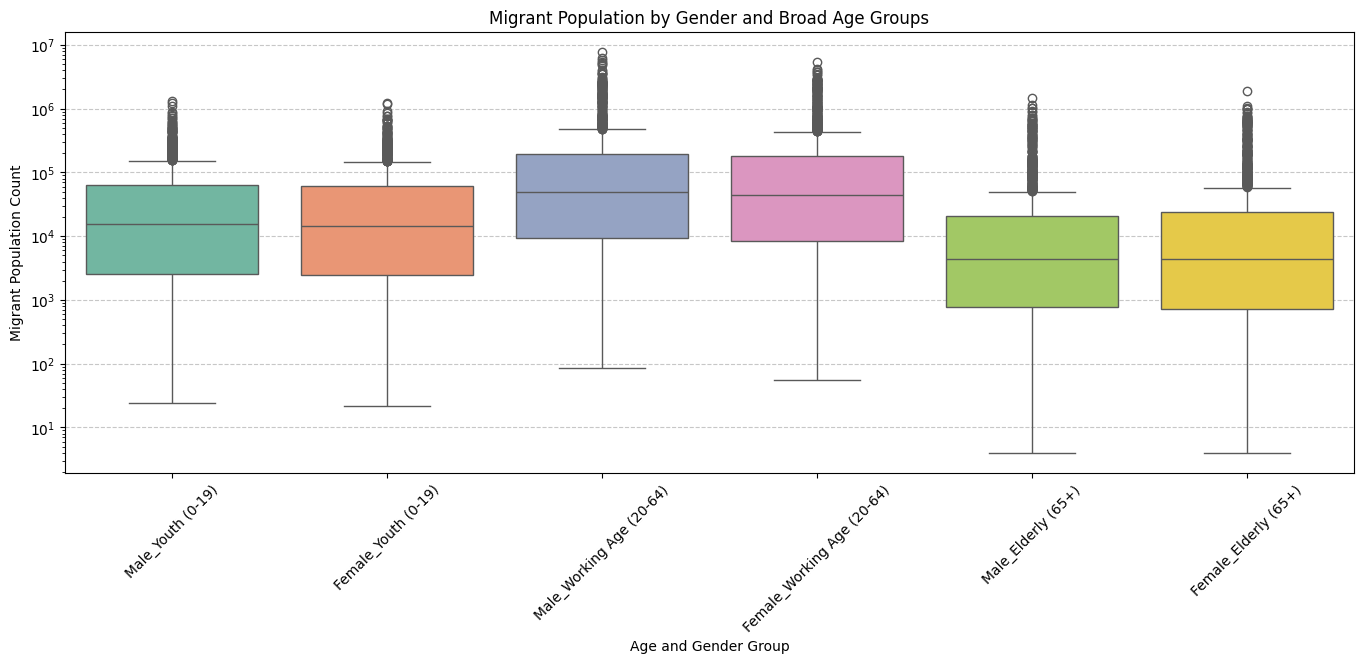

In [119]:
# Group age ranges into broader categories for Male and Female
final_merged_df["Male_Youth (0-19)"] = (
    final_merged_df[["Male_0-4", "Male_5-9", "Male_10-14", "Male_15-19"]].sum(axis=1)
)
final_merged_df["Female_Youth (0-19)"] = (
    final_merged_df[["Female_0-4", "Female_5-9", "Female_10-14", "Female_15-19"]].sum(axis=1)
)
final_merged_df["Male_Working Age (20-64)"] = (
    final_merged_df[
        [
            "Male_20-24",
            "Male_25-29",
            "Male_30-34",
            "Male_35-39",
            "Male_40-44",
            "Male_45-49",
            "Male_50-54",
            "Male_55-59",
            "Male_60-64",
        ]
    ].sum(axis=1)
)
final_merged_df["Female_Working Age (20-64)"] = (
    final_merged_df[
        [
            "Female_20-24",
            "Female_25-29",
            "Female_30-34",
            "Female_35-39",
            "Female_40-44",
            "Female_45-49",
            "Female_50-54",
            "Female_55-59",
            "Female_60-64",
        ]
    ].sum(axis=1)
)
final_merged_df["Male_Elderly (65+)"] = (
    final_merged_df[["Male_65-69", "Male_70-74", "Male_75+"]].sum(axis=1)
)
final_merged_df["Female_Elderly (65+)"] = (
    final_merged_df[["Female_65-69", "Female_70-74", "Female_75+"]].sum(axis=1)
)

# Prepare melted data for visualization
broad_age_gender_groups = [
    "Male_Youth (0-19)",
    "Female_Youth (0-19)",
    "Male_Working Age (20-64)",
    "Female_Working Age (20-64)",
    "Male_Elderly (65+)",
    "Female_Elderly (65+)",
]
melted_gender_data = final_merged_df.melt(
    value_vars=broad_age_gender_groups,
    var_name="Group",
    value_name="Migrant Count",
)

# Create a boxplot comparing migration trends for males and females across broad age groups
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
sns.boxplot(
    x="Group",
    y="Migrant Count",
    data=melted_gender_data,
    palette="Set2",
)
plt.yscale("log")  # Apply log scale to y-axis
plt.title("Migrant Population by Gender and Broad Age Groups")
plt.xlabel("Age and Gender Group")
plt.ylabel("Migrant Population Count")
plt.xticks(rotation=45, ha="center")  # Center-align x-axis labels
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout(pad=2)  # Add padding to avoid label overlap

# Show the plot
plt.show()


In [112]:
final_merged_df

,Year,Country,Location code,Type of data,AllSexes_0-4,AllSexes_5-9,AllSexes_10-14,AllSexes_15-19,AllSexes_20-24,AllSexes_25-29,...,NMR_Target,Change_in_Migration,Migration_to_Population_Ratio,Male_to_Female_Ratio,Rolling_Avg_Migration,Change_in_NMR,NMR_Change,Youth (0-19),Working Age (20-64),Elderly (65+)
448,1990,Afghanistan,4,B R,3693.0,3795.0,4505.0,5370.0,6490.0,7154.0,...,0,NaN,0.004189,1.295686,57686.000000,NaN,NaN,17363.0,38343.0,1980.0
449,1995,Afghanistan,4,B R,4379.0,4705.0,5337.0,6381.0,7729.0,8399.0,...,1,13836.0,0.003586,1.206312,64604.000000,53.09,1.0,20802.0,48478.0,2242.0
450,2000,Afghanistan,4,B R,4487.0,4995.0,5464.0,6549.0,7947.0,8536.0,...,0,4395.0,0.003216,1.295715,68375.000000,-45.72,-1.0,21495.0,52210.0,2212.0
451,2005,Afghanistan,4,B R,5068.0,5602.0,6402.0,7506.0,8766.0,9390.0,...,1,11397.0,0.003024,1.295743,73109.750000,51.71,1.0,24578.0,60462.0,2274.0
452,2010,Afghanistan,4,B R,5873.0,6455.0,7620.0,8792.0,9968.0,10650.0,...,0,14962.0,0.003062,1.295758,78943.000000,-15.41,-1.0,28740.0,71103.0,2433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2000,Zimbabwe,716,B R,16170.0,20469.0,24652.0,28006.0,37496.0,43924.0,...,0,-21117.0,0.033304,1.327150,491985.333333,0.99,0.0,89297.0,305891.0,14921.0
115,2005,Zimbabwe,716,B R,13936.0,18860.0,23289.0,26728.0,35432.0,41396.0,...,0,-7883.0,0.030551,1.325382,469545.500000,-19.18,0.0,82813.0,304041.0,15372.0
116,2010,Zimbabwe,716,B R,12095.0,17499.0,22155.0,25687.0,33717.0,39286.0,...,0,-3919.0,0.030123,1.327838,455297.800000,0.21,0.0,77436.0,304920.0,15951.0
117,2015,Zimbabwe,716,B R,12020.0,12793.0,16941.0,23274.0,31325.0,39904.0,...,0,2175.0,0.028459,1.290707,408470.000000,14.21,0.0,65028.0,308476.0,26978.0


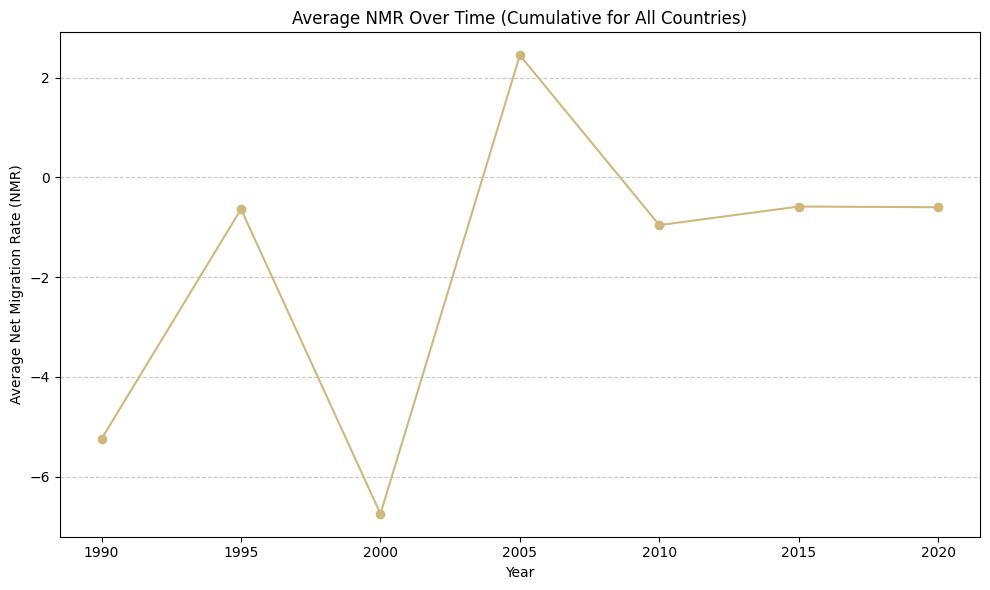

In [120]:
import matplotlib.pyplot as plt

# Ensure the "NMR" column is numeric
final_merged_df["NMR"] = pd.to_numeric(final_merged_df["NMR"], errors="coerce")

# Calculate the average NMR for all countries by year
average_nmr_by_year = final_merged_df.groupby("Year")["NMR"].mean()

# Plot the average NMR over time
plt.figure(figsize=(10, 6))
plt.plot(average_nmr_by_year.index, average_nmr_by_year.values, marker="o", linestyle="-", color="#CFB87C")
plt.title("Average NMR Over Time (Cumulative for All Countries)")
plt.xlabel("Year")
plt.ylabel("Average Net Migration Rate (NMR)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1500x800 with 0 Axes>

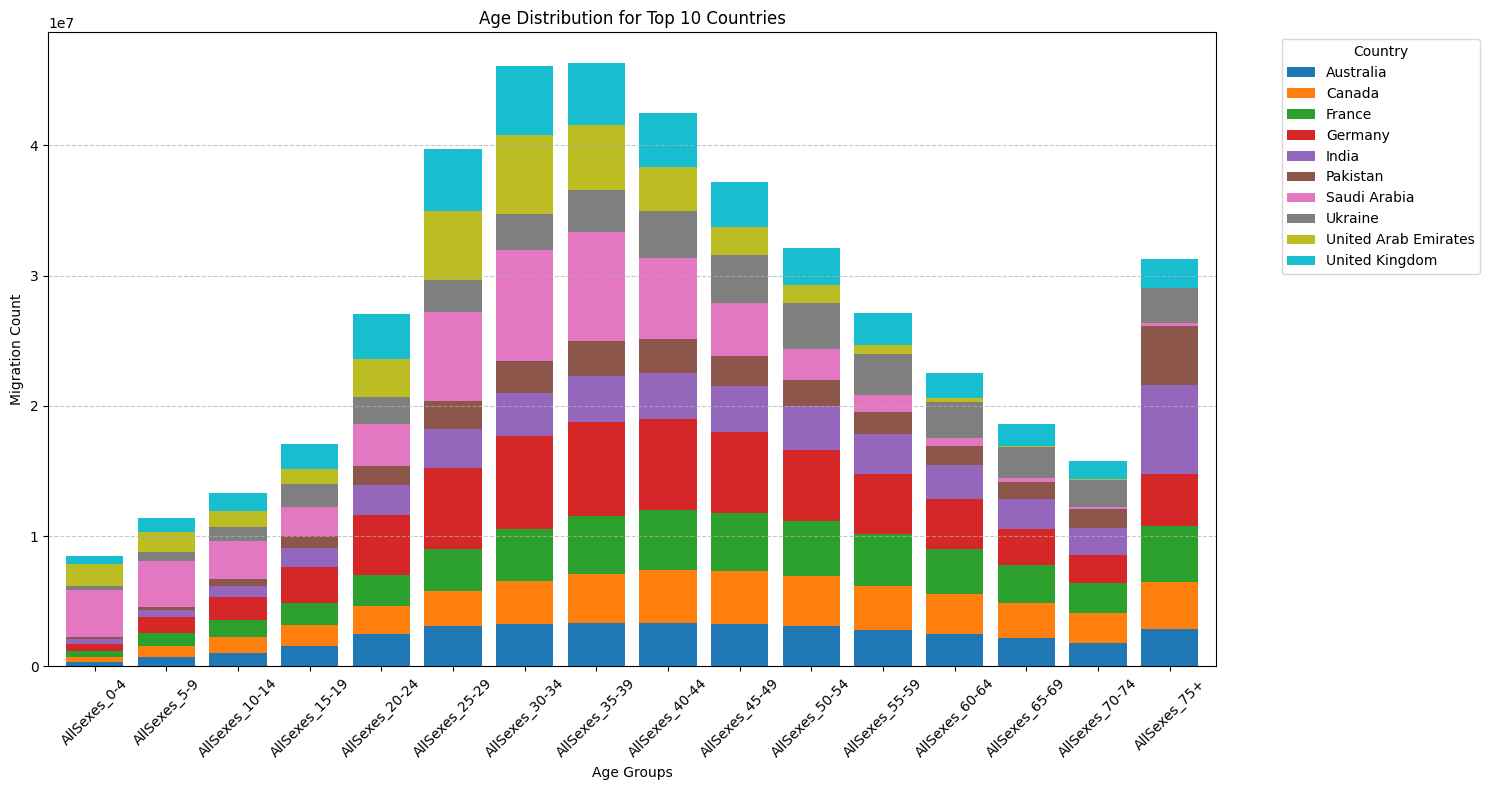

In [122]:
import matplotlib.pyplot as plt

# Select relevant columns for age groups
age_columns = [col for col in final_merged_df.columns if "AllSexes_" in col]

# Remove 'AllSexes_Total' from age columns
age_columns_filtered = [col for col in age_columns if col != "AllSexes_Total"]

# Select top 10 countries based on total population (without considering 'Total' column)
top_10_countries = final_merged_df.groupby("Country")[age_columns_filtered].sum().sum(axis=1).nlargest(10).index

# Filter the dataset for the top 10 countries
top_10_age_distribution = final_merged_df[final_merged_df["Country"].isin(top_10_countries)].groupby("Country")[age_columns_filtered].sum().T

# Plot the age distribution for the top 10 countries (excluding 'Total' column)
plt.figure(figsize=(15, 8))
top_10_age_distribution.plot(kind="bar", stacked=True, figsize=(15, 8), width=0.8)
plt.title("Age Distribution for Top 10 Countries")
plt.xlabel("Age Groups")
plt.ylabel("Migration Count")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



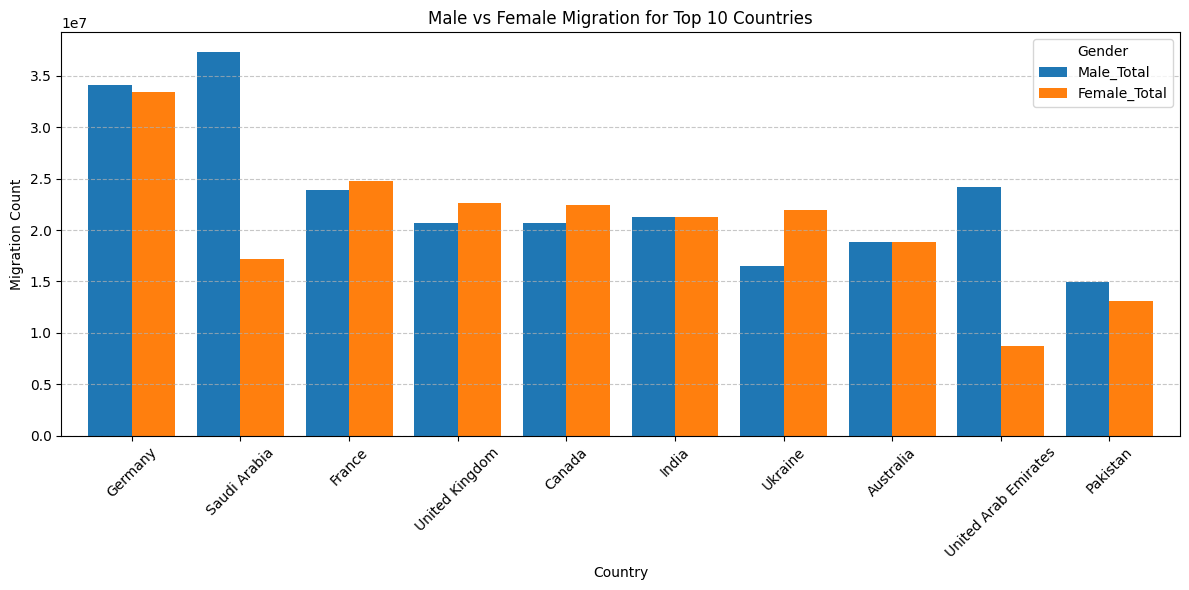

In [129]:
# Aggregate Male and Female total populations by country
gender_distribution = final_merged_df.groupby("Country")[["Male_Total", "Female_Total"]].sum()

# Select top 10 countries based on total population (excluding total column consideration)
top_10_countries = gender_distribution.sum(axis=1).nlargest(10).index

# Filter for the top 10 countries
top_10_gender_distribution = gender_distribution.loc[top_10_countries]

# Plot Male vs Female total populations for the top 10 countries
top_10_gender_distribution.plot(kind="bar", figsize=(12, 6), width=0.8)
plt.title("Male vs Female Migration for Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Migration Count")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-84-0e34247f32cd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refugee_data["Refugee_Percentage"] = (refugee_data["AllSexes_Total"] / refugee_data["POP"]) * 100


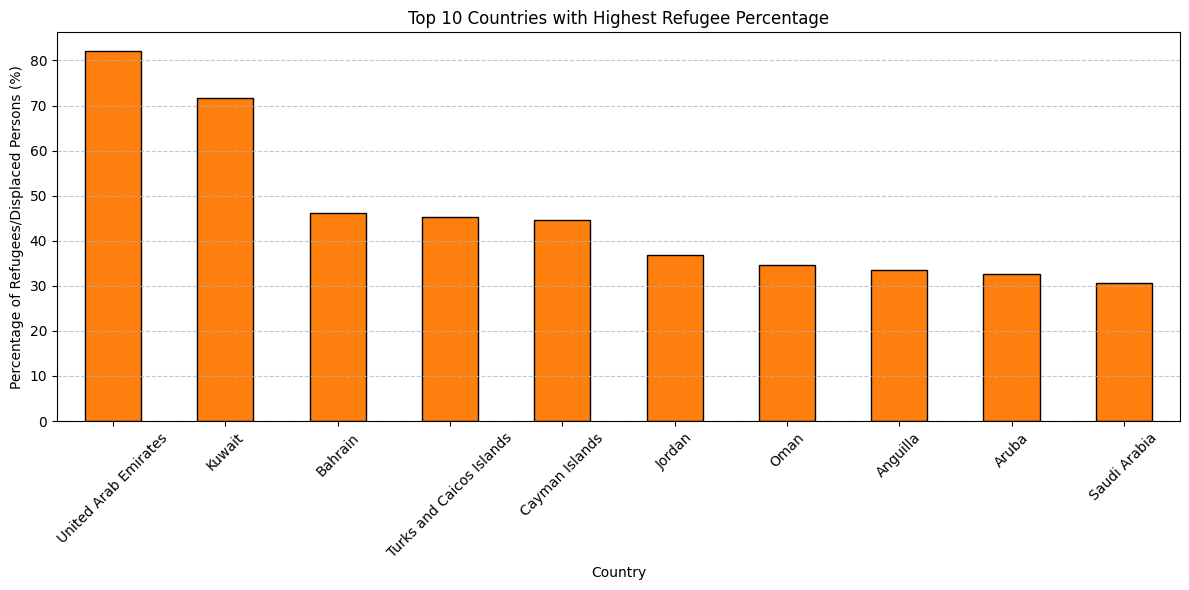

In [84]:
# Ensure columns used in calculation are numeric
final_merged_df["POP"] = pd.to_numeric(final_merged_df["POP"], errors="coerce")
final_merged_df["AllSexes_Total"] = pd.to_numeric(final_merged_df["AllSexes_Total"], errors="coerce")

# Filter data for rows where 'Refugees/displaced persons' is 1
refugee_data = final_merged_df[final_merged_df["Refugees/displaced persons"] == 1]

# Calculate the percentage of refugees/displaced persons with respect to the population
refugee_data["Refugee_Percentage"] = (refugee_data["AllSexes_Total"] / refugee_data["POP"]) * 100

# Aggregate refugee percentages by country
refugee_percentage_by_country = (
    refugee_data.groupby("Country")["Refugee_Percentage"].mean().sort_values(ascending=False)
)

# Select the top 10 countries with the highest refugee percentages
top_10_refugee_percentage_countries = refugee_percentage_by_country.head(10)

# Plot the grouped bar chart for Refugee Percentage
plt.figure(figsize=(12, 6))
top_10_refugee_percentage_countries.plot(kind="bar", color="#ff7f0e", edgecolor="black")
plt.title("Top 10 Countries with Highest Refugee Percentage")
plt.xlabel("Country")
plt.ylabel("Percentage of Refugees/Displaced Persons (%)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-85-33f1b6380411>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreign_born_data["Refugee_Percentage"] = (foreign_born_data["AllSexes_Total"] / foreign_born_data["POP"]) * 100


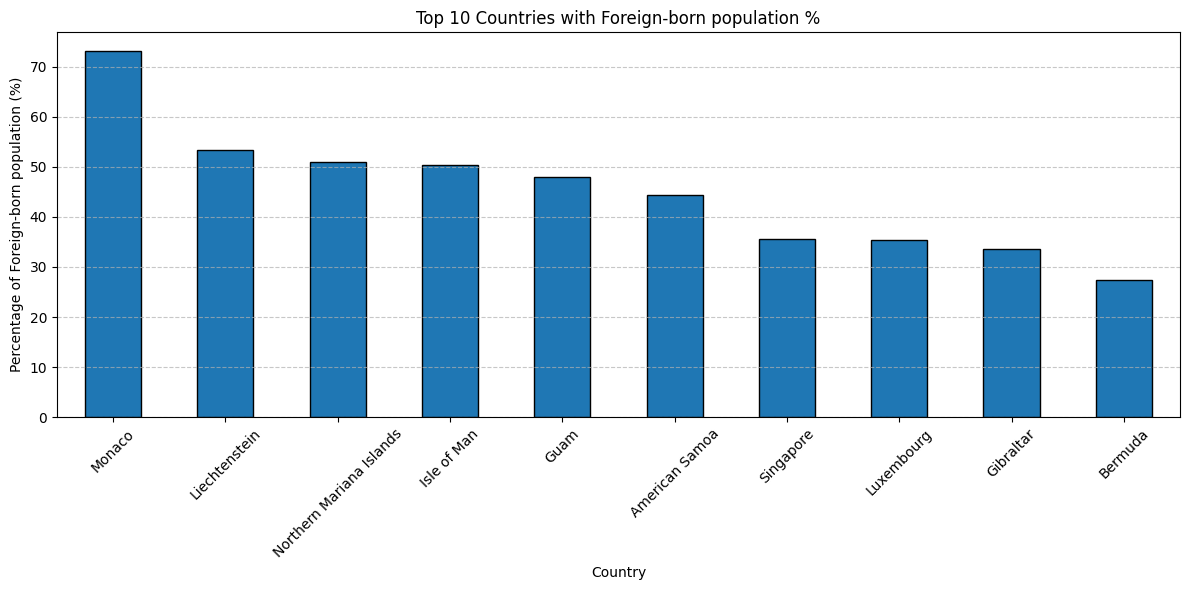

In [85]:
# Filter data where "Type of data (description)" is "Foreign-born population"
foreign_born_data = final_merged_df[final_merged_df["Type of data (description)"] == "Foreign-born population"]

# Calculate the percentage of refugees/displaced persons with respect to the population
foreign_born_data["Refugee_Percentage"] = (foreign_born_data["AllSexes_Total"] / foreign_born_data["POP"]) * 100

# Aggregate refugee percentages by country
foreign_born_percentage_by_country = (
    foreign_born_data.groupby("Country")["Refugee_Percentage"].mean().sort_values(ascending=False)
)

# Select the top 10 countries with the highest refugee percentages
top_10_foreign_born_percentage_countries = foreign_born_percentage_by_country.head(10)

# Plot the grouped bar chart for Refugee Percentage
plt.figure(figsize=(12, 6))
top_10_foreign_born_percentage_countries.plot(kind="bar", color="#1f77b4", edgecolor="black")
plt.title("Top 10 Countries with Foreign-born population %")
plt.xlabel("Country")
plt.ylabel("Percentage of Foreign-born population (%)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

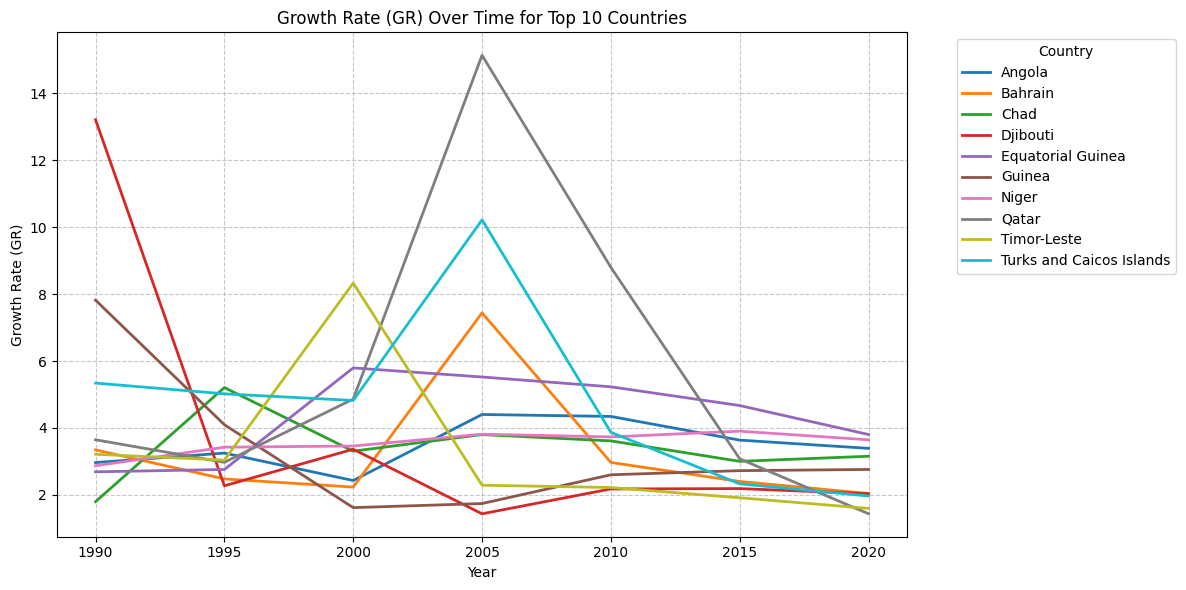

In [86]:
# Check data types of GR column
final_merged_df["GR"] = pd.to_numeric(final_merged_df["GR"], errors="coerce")

# Select top 10 countries based on average Growth Rate (GR)
top_10_countries = final_merged_df.groupby("Country")["GR"].mean().nlargest(10).index

# Filter data for top 10 countries
top_10_growth_rate_data = final_merged_df[final_merged_df["Country"].isin(top_10_countries)]

# Pivot the data for visualization
top_10_growth_rate_pivot = top_10_growth_rate_data.pivot(index="Year", columns="Country", values="GR")

# Plot Growth Rate (GR) Over Time for top 10 countries
plt.figure(figsize=(12, 6))
top_10_growth_rate_pivot.plot(figsize=(12, 6), linewidth=2)
plt.title("Growth Rate (GR) Over Time for Top 10 Countries")
plt.xlabel("Year")
plt.ylabel("Growth Rate (GR)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


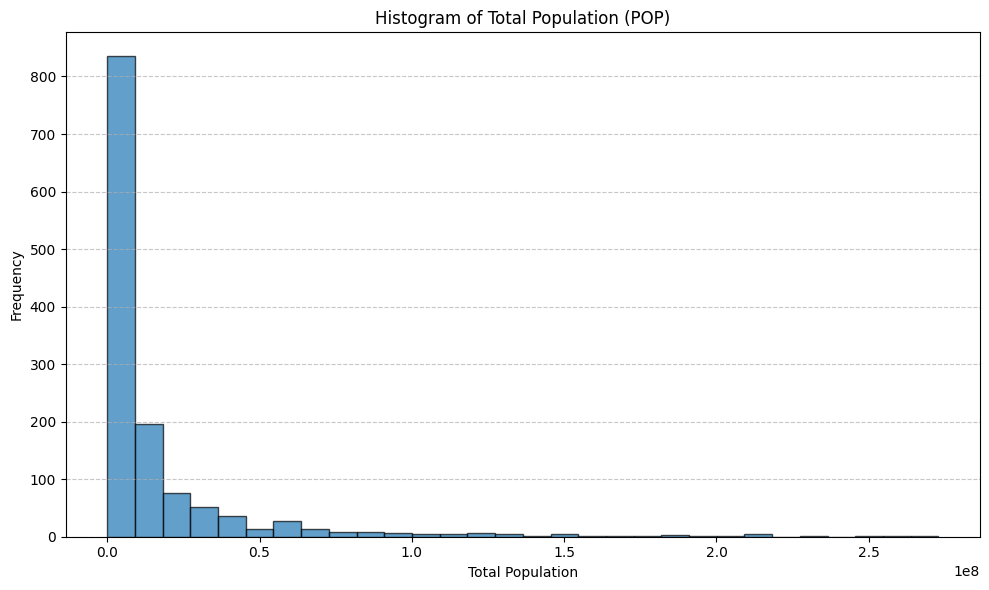

In [87]:
# Convert POP column to numeric if necessary
final_merged_df["POP"] = pd.to_numeric(final_merged_df["POP"], errors="coerce")

# Define a reasonable range for the X-axis by filtering out extreme values (e.g., outliers)
filtered_pop = final_merged_df["POP"].dropna()
pop_upper_limit = filtered_pop.quantile(0.99)  # Keep 99% of the data, removing extreme outliers
filtered_pop = filtered_pop[filtered_pop <= pop_upper_limit]

# Plot histogram of Total Population (POP) with adjusted range
plt.figure(figsize=(10, 6))
plt.hist(filtered_pop, bins=30, edgecolor="black", alpha=0.7, color="#1f77b4")
plt.title("Histogram of Total Population (POP)")
plt.xlabel("Total Population")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


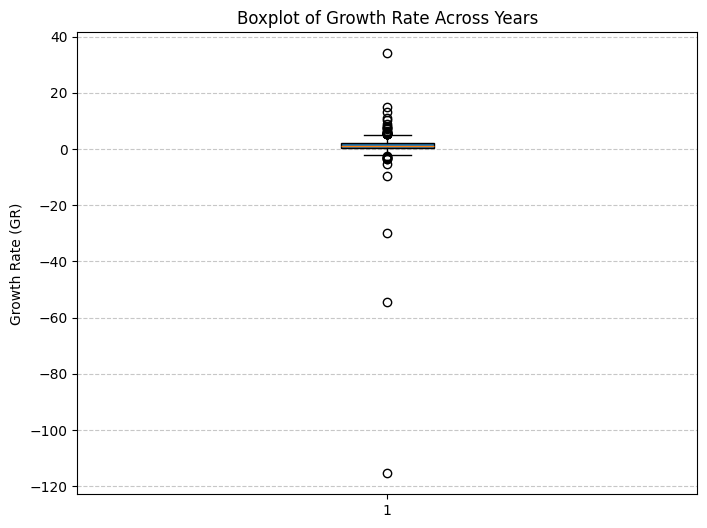

In [88]:
# Create a boxplot for Growth Rate (GR) using final_merged_df
plt.figure(figsize=(8, 6))
plt.boxplot(final_merged_df["GR"], vert=True, patch_artist=True)
plt.ylabel("Growth Rate (GR)")
plt.title("Boxplot of Growth Rate Across Years")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

In [89]:
import plotly.express as px

# Create a choropleth map using Plotly
fig = px.choropleth(
    final_merged_df,
    locations="Country",
    locationmode="country names",
    color="POP_DENS",
    hover_name="Country",
    color_continuous_scale="OrRd",
    title="Choropleth Map of Population Density (POP_DENS)",
)

# Show the interactive plot
fig.show()


In [90]:
final_merged_df['POP_DENS'] = pd.to_numeric(final_merged_df['POP_DENS'], errors='coerce')

In [91]:
final_merged_df

,Year,Country,Location code,Type of data,AllSexes_0-4,AllSexes_5-9,AllSexes_10-14,AllSexes_15-19,AllSexes_20-24,AllSexes_25-29,...,GR,AREA_KM2,POP_DENS,TFR,CBR,E0,IMR,CDR,NMR,NMR_Target
0,1990,Burundi,108,B R,22459.0,23463.0,20802.0,20214.0,27170.0,38450.0,...,2.133,25680,209.3,6.7428,46.05,50.48,105.28,15.90,-8.82,0
1,1995,Burundi,108,B R,17183.0,17951.0,15915.0,15465.0,20787.0,29417.0,...,1.244,25680,226.3,6.6487,45.04,49.87,106.92,15.70,-16.90,0
2,2000,Burundi,108,B R,5969.0,9365.0,10078.0,10609.0,12492.0,13617.0,...,2.470,25680,244.6,6.5545,44.30,54.25,86.76,12.73,-6.88,0
3,2005,Burundi,108,B R,23314.0,15343.0,18719.0,14936.0,13975.0,17104.0,...,3.566,25680,289.7,6.4603,43.69,58.11,70.22,10.42,2.39,1
4,2010,Burundi,108,B R,29503.0,16917.0,13353.0,18361.0,19854.0,21673.0,...,3.442,25680,355.9,6.2408,42.20,61.50,56.81,8.61,0.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,2000,Tuvalu,798,C,13.0,12.0,11.0,19.0,21.0,21.0,...,0.159,26,386.0,3.6012,24.71,61.58,43.61,10.76,-12.35,0
1332,2005,Tuvalu,798,C,13.0,12.0,12.0,17.0,20.0,22.0,...,0.541,26,391.2,3.2900,22.81,62.68,41.01,10.13,-7.28,0
1333,2010,Tuvalu,798,C,15.0,12.0,15.0,14.0,18.0,22.0,...,0.668,26,403.0,3.1400,23.00,64.46,37.02,9.26,-7.06,0
1334,2015,Tuvalu,798,C,15.0,14.0,15.0,15.0,19.0,21.0,...,0.809,26,418.4,3.0000,23.62,66.15,33.40,8.73,-6.80,0


<Figure size 1400x800 with 0 Axes>

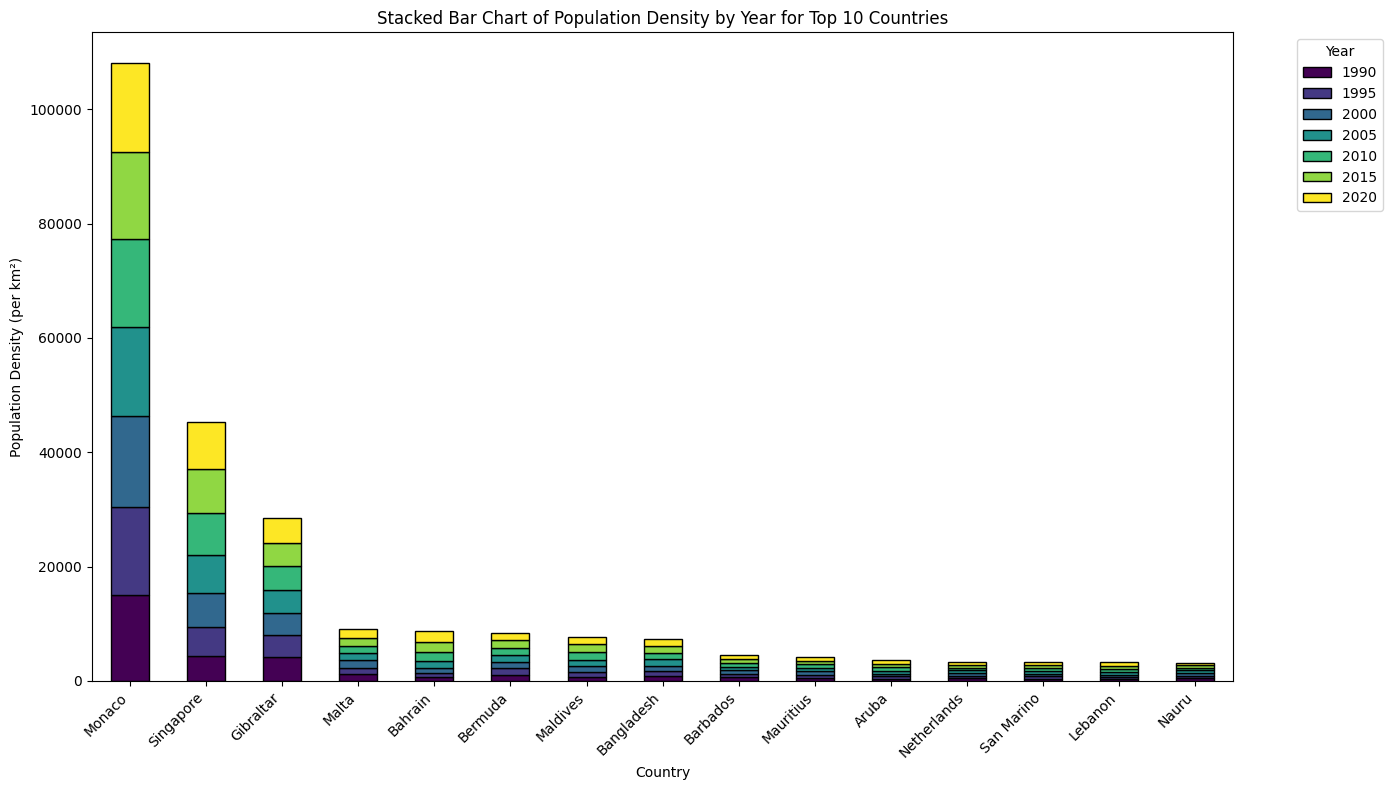

In [92]:
# Identify top 10 countries by their overall population density (ignoring years)
top_10_countries = (
    final_merged_df.groupby("Country")["POP_DENS"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
    .index
)

# Filter data for only the top 10 countries
filtered_data = final_merged_df[final_merged_df["Country"].isin(top_10_countries)]

# Pivot data to prepare for a stacked bar chart
pivot_data = filtered_data.pivot_table(index="Country", columns="Year", values="POP_DENS", aggfunc="mean")

# Sort countries by their total population density across all years
pivot_data = pivot_data.loc[pivot_data.sum(axis=1).sort_values(ascending=False).index]

# Create a stacked bar chart
plt.figure(figsize=(14, 8))
pivot_data.plot(kind="bar", stacked=True, figsize=(14, 8), cmap="viridis", edgecolor="black")

plt.xlabel("Country")
plt.ylabel("Population Density (per km²)")
plt.title("Stacked Bar Chart of Population Density by Year for Top 10 Countries")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show the plot
plt.show()


In [93]:
top_10_countries

Index(['Monaco', 'Singapore', 'Gibraltar', 'Malta', 'Bahrain', 'Bermuda',
       'Maldives', 'Bangladesh', 'Barbados', 'Mauritius', 'Aruba',
       'Netherlands', 'San Marino', 'Lebanon', 'Nauru'],
      dtype='object', name='Country')

In [94]:
filtered_data

,Year,Country,Location code,Type of data,AllSexes_0-4,AllSexes_5-9,AllSexes_10-14,AllSexes_15-19,AllSexes_20-24,AllSexes_25-29,...,GR,AREA_KM2,POP_DENS,TFR,CBR,E0,IMR,CDR,NMR,NMR_Target
56,1990,Mauritius,480,C,320.0,388.0,304.0,199.0,224.0,330.0,...,0.791,2030,523.0,2.3338,21.29,69.25,20.88,6.62,-6.76,0
57,1995,Mauritius,480,C,311.0,522.0,560.0,408.0,657.0,986.0,...,1.039,2030,553.3,2.1391,18.35,70.19,19.09,6.65,-1.31,0
58,2000,Mauritius,480,C,228.0,316.0,284.0,223.0,3385.0,4393.0,...,1.104,2030,584.5,2.0179,17.06,71.40,16.41,6.52,0.50,1
59,2005,Mauritius,480,C,359.0,449.0,479.0,699.0,1033.0,4026.0,...,0.856,2030,612.4,1.8195,14.94,72.48,14.68,6.66,0.28,1
60,2010,Mauritius,480,C,306.0,582.0,738.0,1031.0,1501.0,1892.0,...,0.440,2030,631.3,1.4549,11.57,73.56,13.12,6.93,-0.24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,2000,Nauru,520,C R,167.0,136.0,141.0,142.0,182.0,226.0,...,-0.172,21,469.3,3.5415,27.90,60.59,11.08,7.31,-22.32,0
1276,2005,Nauru,520,C R,146.0,142.0,117.0,127.0,142.0,179.0,...,0.440,21,476.2,3.3066,27.20,62.30,10.26,6.80,-16.00,0
1277,2010,Nauru,520,C R,65.0,52.0,47.0,46.0,64.0,82.0,...,0.574,21,439.9,3.1300,28.15,64.01,9.48,6.28,-16.13,0
1278,2015,Nauru,520,C R,117.0,90.0,85.0,104.0,157.0,198.0,...,0.516,21,452.1,2.8800,24.96,65.67,8.76,6.11,-13.69,0


In [95]:
  # Generate a choropleth map for Foreign-born population using Plotly
fig_foreign_born = px.choropleth(
    final_merged_df,
    locations="Country",
    locationmode="country names",
    color="Foreign-born population",
    hover_name="Country",
    color_continuous_scale="Blues",
    title="Choropleth Map of Foreign-born Population",
)

# Display the Foreign-born population map
fig_foreign_born.show()

# Generate a choropleth map for Refugees/displaced persons using Plotly
fig_refugees = px.choropleth(
    final_merged_df,
    locations="Country",
    locationmode="country names",
    color="Refugees/displaced persons",
    hover_name="Country",
    color_continuous_scale="Reds",
    title="Choropleth Map of Refugees/Displaced Persons",
)

# Display the Refugees/Displaced persons map
fig_refugees.show()


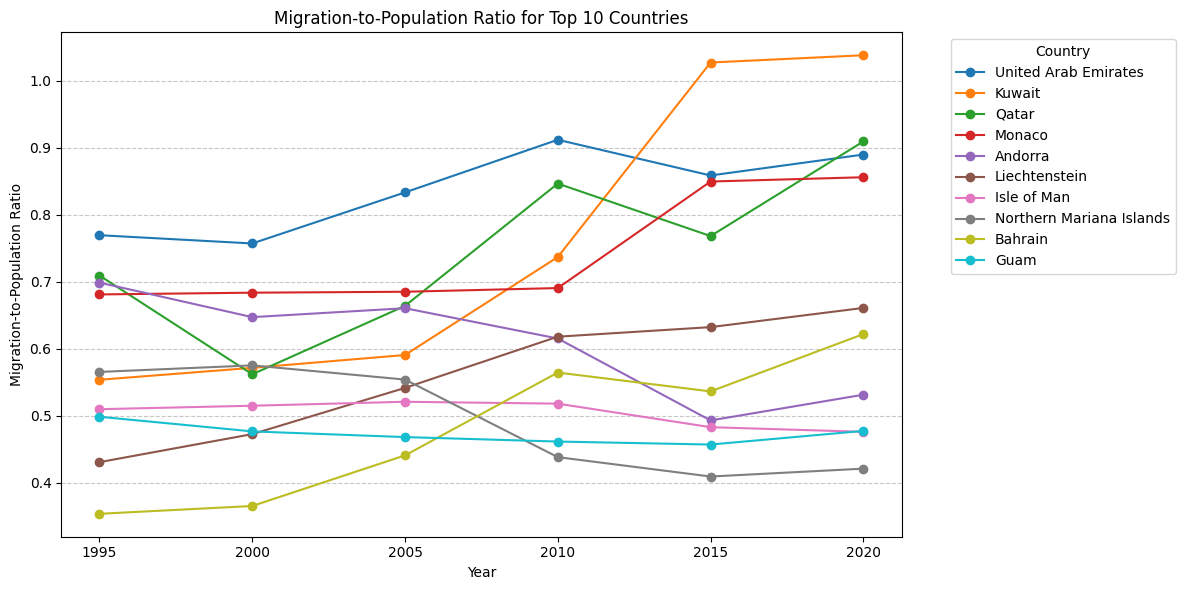

In [96]:
# Ensure necessary columns are numeric
final_merged_df["POP"] = pd.to_numeric(final_merged_df["POP"], errors="coerce")
final_merged_df["AllSexes_Total"] = pd.to_numeric(final_merged_df["AllSexes_Total"], errors="coerce")
final_merged_df["Male_Total"] = pd.to_numeric(final_merged_df["Male_Total"], errors="coerce")
final_merged_df["Female_Total"] = pd.to_numeric(final_merged_df["Female_Total"], errors="coerce")

# Sort by Country and Year for accurate calculations
final_merged_df = final_merged_df.sort_values(by=["Country", "Year"])

# Derived variable: Change in migration (growth rate of migration)
final_merged_df["Change_in_Migration"] = final_merged_df.groupby("Country")["AllSexes_Total"].diff()

# Derived variable: Migration-to-population ratio
final_merged_df["Migration_to_Population_Ratio"] = final_merged_df["AllSexes_Total"] / final_merged_df["POP"]

# Derived variable: Male-to-female migrant ratio
final_merged_df["Male_to_Female_Ratio"] = final_merged_df["Male_Total"] / final_merged_df["Female_Total"]

# Derived variable: Rolling average of migration (5-year window)
final_merged_df["Rolling_Avg_Migration"] = (
    final_merged_df.groupby("Country")["AllSexes_Total"].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
)

# Filter data for visualization
filtered_data = final_merged_df.dropna(subset=["Change_in_Migration", "Migration_to_Population_Ratio", "Male_to_Female_Ratio"])

# Visualize Migration-to-Population Ratio for top 10 countries
top_countries = (
    filtered_data.groupby("Country")["Migration_to_Population_Ratio"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)
top_countries_data = filtered_data[filtered_data["Country"].isin(top_countries)]

# Plot Migration-to-Population Ratio for top 10 countries
plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = top_countries_data[top_countries_data["Country"] == country]
    plt.plot(country_data["Year"], country_data["Migration_to_Population_Ratio"], marker="o", label=country)

plt.title("Migration-to-Population Ratio for Top 10 Countries")
plt.xlabel("Year")
plt.ylabel("Migration-to-Population Ratio")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


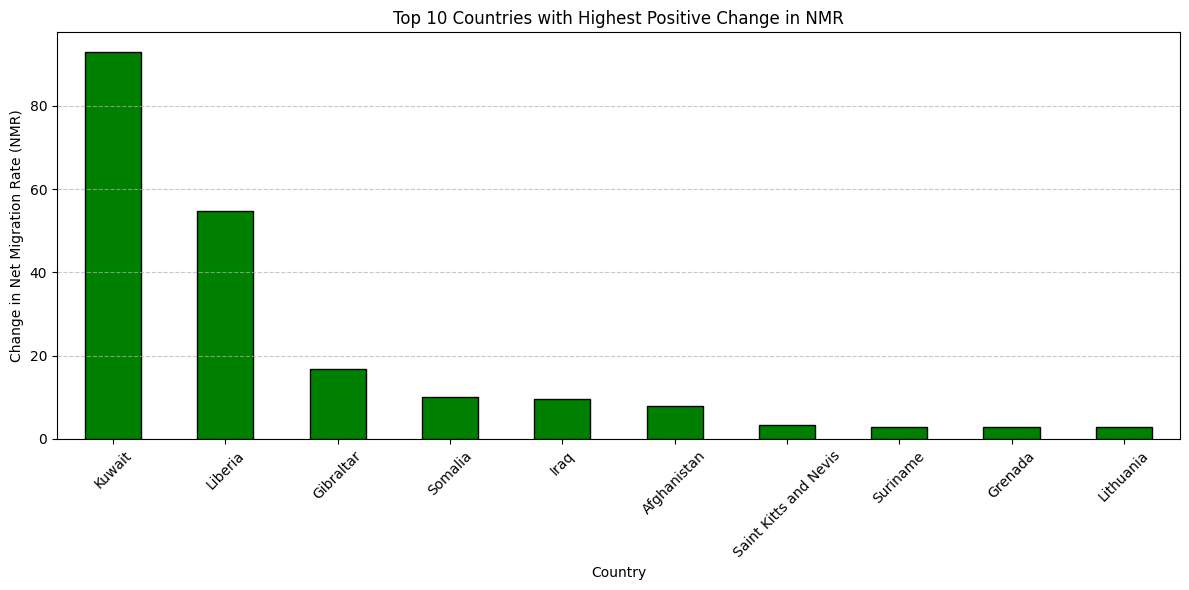

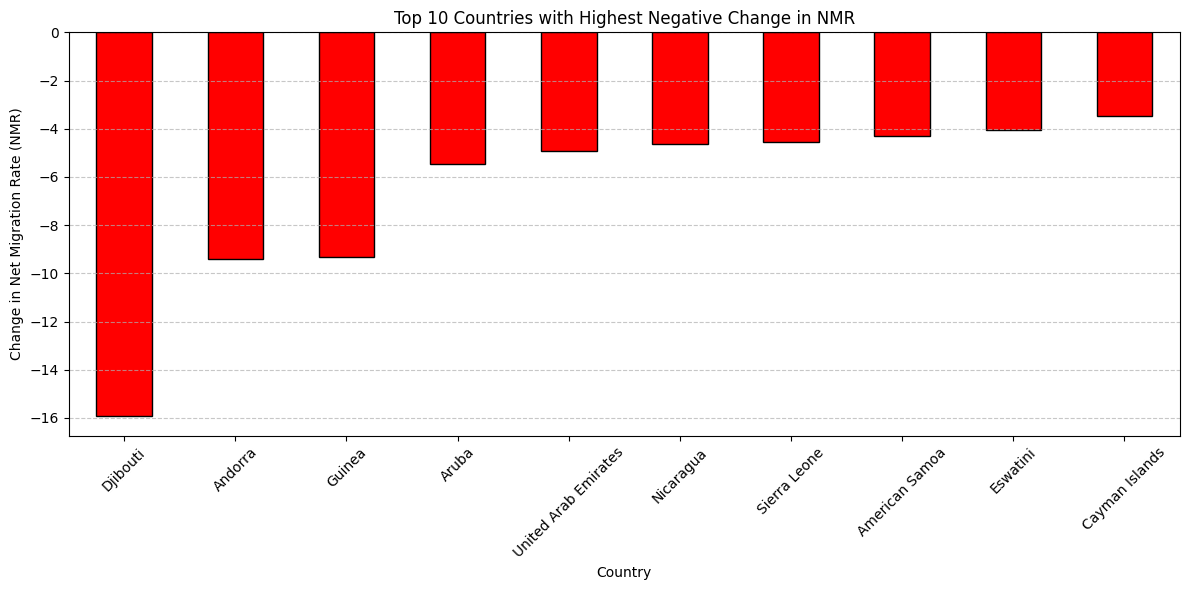

In [97]:
# Ensure NMR column is numeric
final_merged_df["NMR"] = pd.to_numeric(final_merged_df["NMR"], errors="coerce")

# Sort dataset by Country and Year for proper difference calculation
final_merged_df = final_merged_df.sort_values(by=["Country", "Year"])

# Calculate the change in NMR over time for each country
final_merged_df["Change_in_NMR"] = final_merged_df.groupby("Country")["NMR"].diff()

# Filter out missing values after calculating the change
filtered_nmr_data = final_merged_df.dropna(subset=["Change_in_NMR"])

# Get the top 10 countries with the **highest positive** change in NMR
top_10_positive_nmr = (
    filtered_nmr_data.groupby("Country")["Change_in_NMR"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Get the top 10 countries with the **highest negative** change in NMR
top_10_negative_nmr = (
    filtered_nmr_data.groupby("Country")["Change_in_NMR"]
    .mean()
    .sort_values(ascending=True)
    .head(10)
)

# Plot Positive Change in NMR
plt.figure(figsize=(12, 6))
top_10_positive_nmr.plot(kind="bar", color="green", edgecolor="black")
plt.title("Top 10 Countries with Highest Positive Change in NMR")
plt.xlabel("Country")
plt.ylabel("Change in Net Migration Rate (NMR)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Plot Negative Change in NMR
plt.figure(figsize=(12, 6))
top_10_negative_nmr.plot(kind="bar", color="red", edgecolor="black")
plt.title("Top 10 Countries with Highest Negative Change in NMR")
plt.xlabel("Country")
plt.ylabel("Change in Net Migration Rate (NMR)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


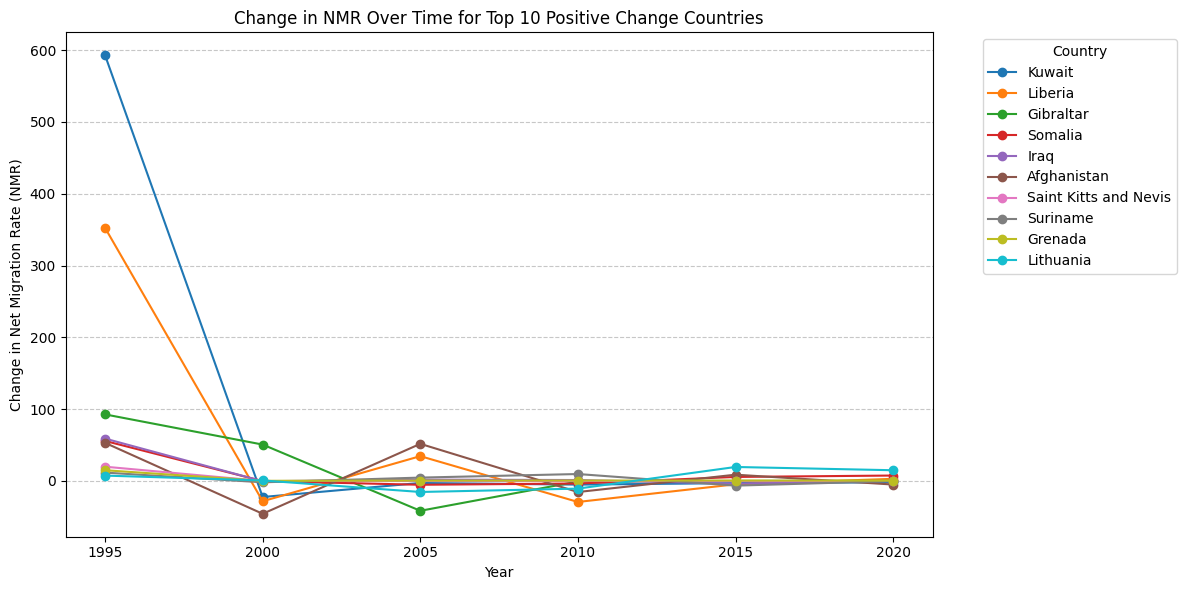

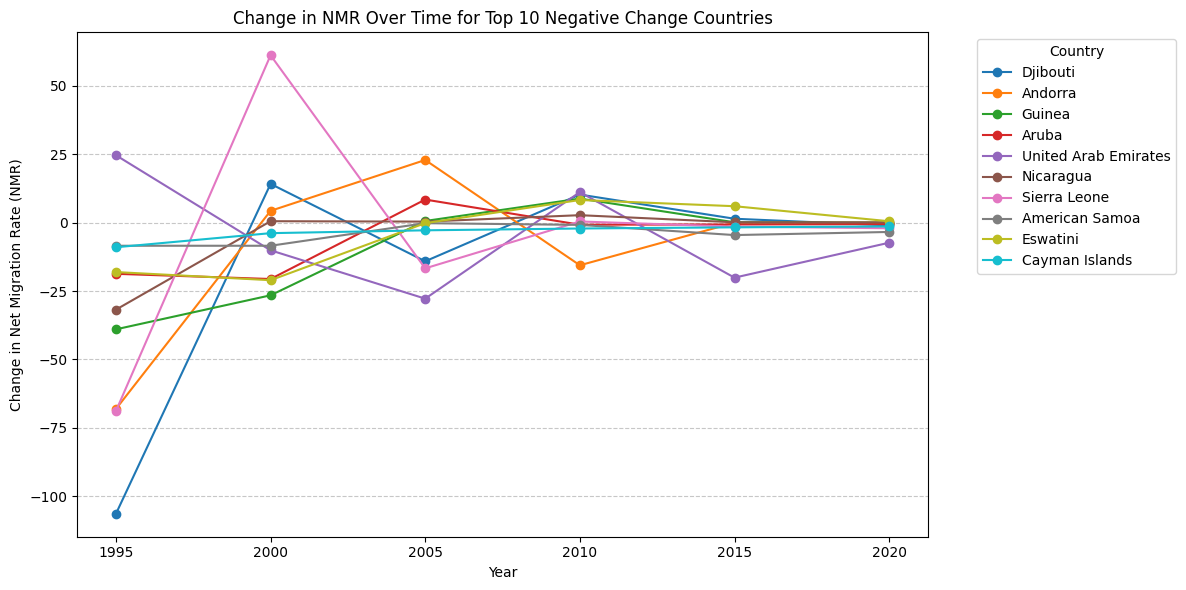

In [98]:
# Select top 10 countries with the highest positive and negative change in NMR
top_positive_countries = top_10_positive_nmr.index
top_negative_countries = top_10_negative_nmr.index

# Filter the dataset for these countries
positive_nmr_data = filtered_nmr_data[filtered_nmr_data["Country"].isin(top_positive_countries)]
negative_nmr_data = filtered_nmr_data[filtered_nmr_data["Country"].isin(top_negative_countries)]

# Plot Line Graph for Positive Change in NMR
plt.figure(figsize=(12, 6))
for country in top_positive_countries:
    country_data = positive_nmr_data[positive_nmr_data["Country"] == country]
    plt.plot(country_data["Year"], country_data["Change_in_NMR"], marker="o", label=country)

plt.title("Change in NMR Over Time for Top 10 Positive Change Countries")
plt.xlabel("Year")
plt.ylabel("Change in Net Migration Rate (NMR)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Plot Line Graph for Negative Change in NMR
plt.figure(figsize=(12, 6))
for country in top_negative_countries:
    country_data = negative_nmr_data[negative_nmr_data["Country"] == country]
    plt.plot(country_data["Year"], country_data["Change_in_NMR"], marker="o", label=country)

plt.title("Change in NMR Over Time for Top 10 Negative Change Countries")
plt.xlabel("Year")
plt.ylabel("Change in Net Migration Rate (NMR)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [99]:
final_merged_df

,Year,Country,Location code,Type of data,AllSexes_0-4,AllSexes_5-9,AllSexes_10-14,AllSexes_15-19,AllSexes_20-24,AllSexes_25-29,...,E0,IMR,CDR,NMR,NMR_Target,Change_in_Migration,Migration_to_Population_Ratio,Male_to_Female_Ratio,Rolling_Avg_Migration,Change_in_NMR
448,1990,Afghanistan,4,B R,3693.0,3795.0,4505.0,5370.0,6490.0,7154.0,...,48.31,130.44,17.14,-50.48,0,NaN,0.004189,1.295686,57686.000000,NaN
449,1995,Afghanistan,4,B R,4379.0,4705.0,5337.0,6381.0,7729.0,8399.0,...,53.25,103.37,13.67,2.61,1,13836.0,0.003586,1.206312,64604.000000,53.09
450,2000,Afghanistan,4,B R,4487.0,4995.0,5464.0,6549.0,7947.0,8536.0,...,56.38,87.64,11.48,-43.11,0,4395.0,0.003216,1.295715,68375.000000,-45.72
451,2005,Afghanistan,4,B R,5068.0,5602.0,6402.0,7506.0,8766.0,9390.0,...,59.18,74.24,9.71,8.60,1,11397.0,0.003024,1.295743,73109.750000,51.71
452,2010,Afghanistan,4,B R,5873.0,6455.0,7620.0,8792.0,9968.0,10650.0,...,61.67,62.85,8.14,-6.81,0,14962.0,0.003062,1.295758,78943.000000,-15.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2000,Zimbabwe,716,B R,16170.0,20469.0,24652.0,28006.0,37496.0,43924.0,...,46.50,51.97,15.38,-1.29,0,-21117.0,0.033304,1.327150,491985.333333,0.99
115,2005,Zimbabwe,716,B R,13936.0,18860.0,23289.0,26728.0,35432.0,41396.0,...,46.36,53.67,15.80,-20.47,0,-7883.0,0.030551,1.325382,469545.500000,-19.18
116,2010,Zimbabwe,716,B R,12095.0,17499.0,22155.0,25687.0,33717.0,39286.0,...,54.86,51.36,11.79,-20.26,0,-3919.0,0.030123,1.327838,455297.800000,0.21
117,2015,Zimbabwe,716,B R,12020.0,12793.0,16941.0,23274.0,31325.0,39904.0,...,62.00,42.18,8.83,-6.05,0,2175.0,0.028459,1.290707,408470.000000,14.21


<ipython-input-100-f2377a043f80>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




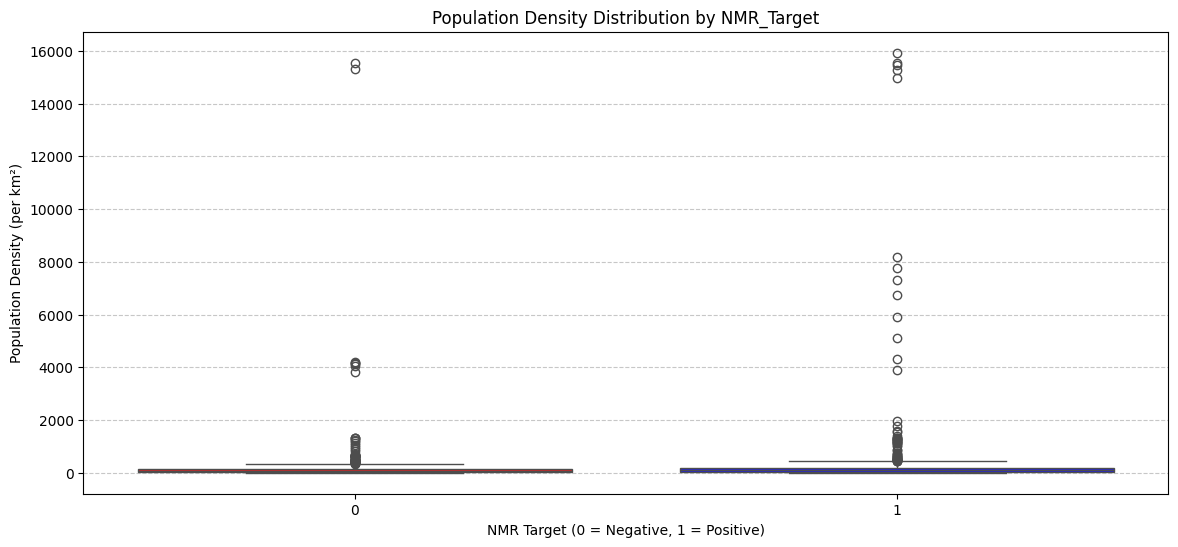

In [100]:
import seaborn as sns

numeric_cols = ["POP", "POP_DENS", "TFR", "CBR", "E0", "IMR", "CDR", "NMR"]
for col in numeric_cols:
    final_merged_df[col] = pd.to_numeric(final_merged_df[col], errors="coerce")

# Plot 1: Boxplot - Distribution of key features by NMR_Target
plt.figure(figsize=(14, 6))
sns.boxplot(data=final_merged_df, x="NMR_Target", y="POP_DENS", palette=["red", "blue"])
plt.title("Population Density Distribution by NMR_Target")
plt.xlabel("NMR Target (0 = Negative, 1 = Positive)")
plt.ylabel("Population Density (per km²)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

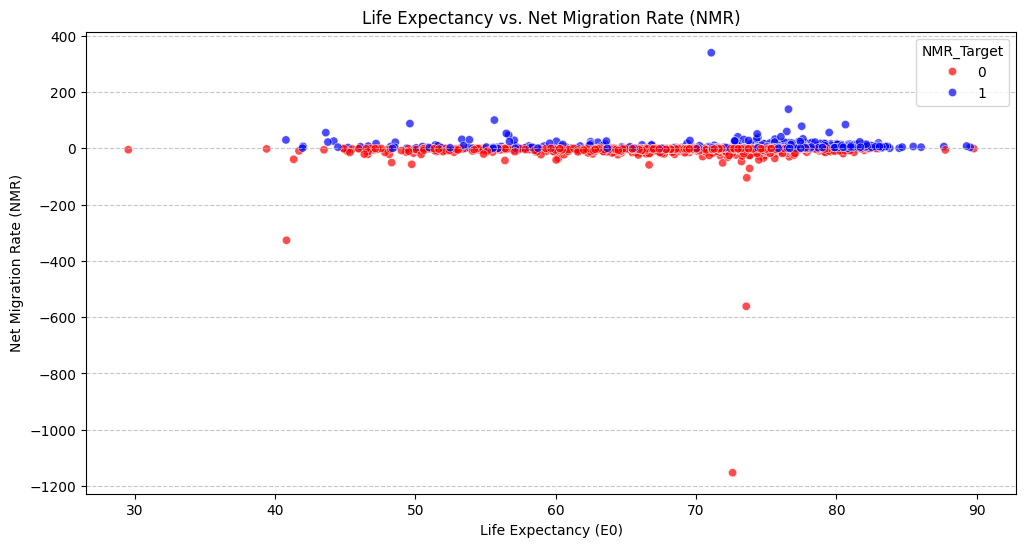

In [101]:
# Plot 3: Scatter Plot - Life Expectancy (E0) vs. NMR, Colored by NMR_Target
plt.figure(figsize=(12, 6))
sns.scatterplot(data=final_merged_df, x="E0", y="NMR", hue="NMR_Target", palette=["red", "blue"], alpha=0.7)
plt.title("Life Expectancy vs. Net Migration Rate (NMR)")
plt.xlabel("Life Expectancy (E0)")
plt.ylabel("Net Migration Rate (NMR)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

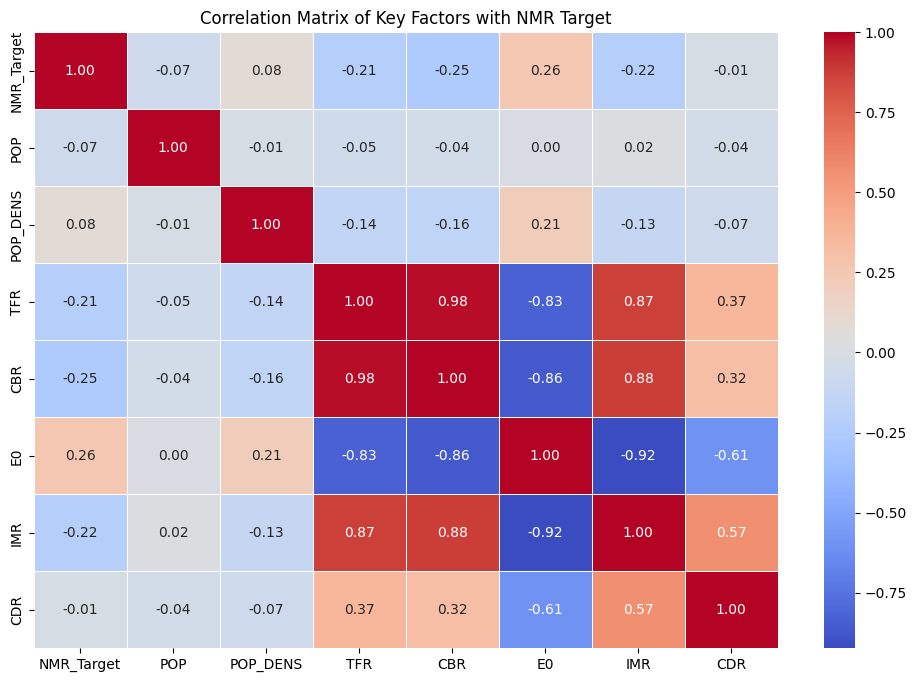

In [134]:
# Plot 4: Correlation Heatmap - Key Features Impacting NMR_Target
plt.figure(figsize=(12, 8))
correlation_matrix = final_merged_df[["NMR_Target", "POP", "POP_DENS", "TFR", "CBR", "E0", "IMR", "CDR"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Factors with NMR Target")
plt.show()

<ipython-input-132-8f887d0fb1dc>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




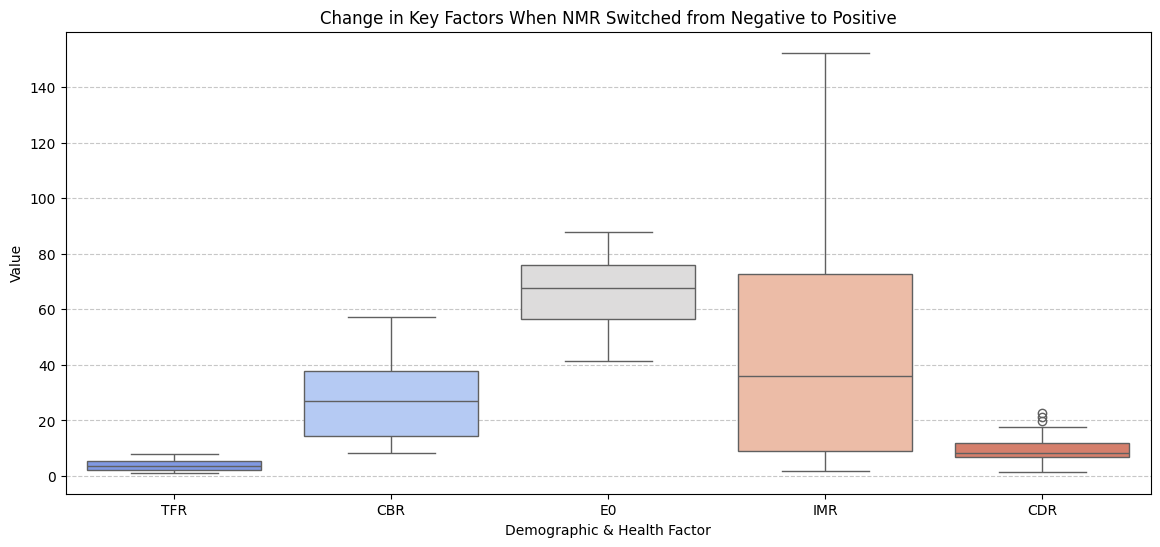

In [132]:
# Plot 1: Boxplot - Comparing Factor Distributions Before and After NMR Flipped
plt.figure(figsize=(14, 6))
sns.boxplot(data=melted_df, x="Factor", y="Value", palette="coolwarm")
plt.title("Change in Key Factors When NMR Switched from Negative to Positive")
plt.xlabel("Demographic & Health Factor")
plt.ylabel("Value")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [105]:
# Convert necessary columns to numeric
numeric_cols = ["POP", "POP_DENS", "TFR", "CBR", "E0", "IMR", "CDR", "NMR"]
for col in numeric_cols:
    final_merged_df[col] = pd.to_numeric(final_merged_df[col], errors="coerce")

# Sort dataset by Country and Year for tracking changes
final_merged_df = final_merged_df.sort_values(by=["Country", "Year"])

# Recreate NMR_Target column (1 = Positive NMR, 0 = Negative NMR)
final_merged_df["NMR_Target"] = (final_merged_df["NMR"] > 0).astype(int)

# Identify countries where NMR changed from positive (1) to negative (0)
final_merged_df["NMR_Change"] = final_merged_df.groupby("Country")["NMR_Target"].diff()

# Filter for cases where NMR switched from positive (1) to negative (0)
nmr_switch_df = final_merged_df[final_merged_df["NMR_Change"] == -1]

# Calculate absolute change in NMR for countries where the switch occurred
nmr_switch_df["Abs_NMR_Change"] = nmr_switch_df.groupby("Country")["NMR"].diff().abs()

# Select top 10 countries with the largest absolute NMR change
top_10_countries = (
    nmr_switch_df.groupby("Country")["Abs_NMR_Change"].max().sort_values(ascending=False).head(10).index
)

# Filter dataset for these top 10 countries
filtered_nmr_switch_df = final_merged_df[final_merged_df["Country"].isin(top_10_countries)]

# Select relevant columns for analysis
change_factors = ["TFR", "CBR", "E0", "IMR", "CDR"]

<ipython-input-105-0105a176b4a1>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



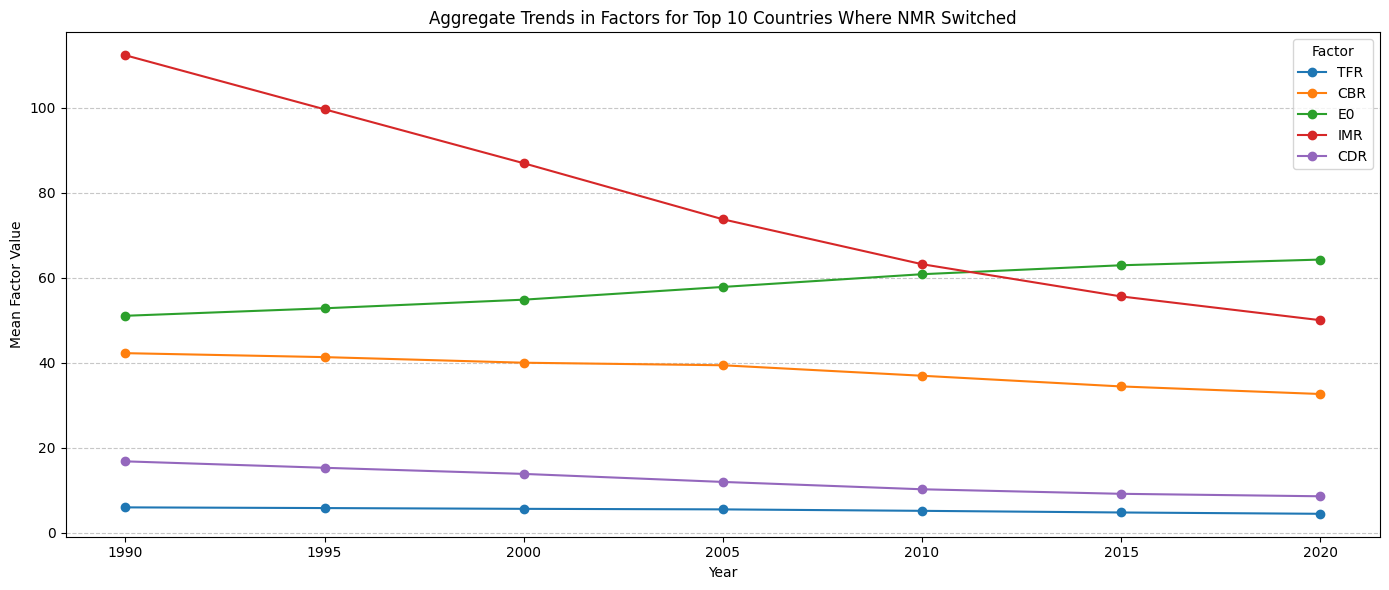

In [106]:
### Approach 2: Aggregate Across Countries
# Calculate mean values for each factor over time across the top 10 countries
aggregated_factors = filtered_nmr_switch_df.groupby("Year")[change_factors].mean()

# Plot: Aggregate trends across countries
plt.figure(figsize=(14, 6))
for factor in change_factors:
    plt.plot(aggregated_factors.index, aggregated_factors[factor], marker="o", linestyle="-", label=factor)

plt.title("Aggregate Trends in Factors for Top 10 Countries Where NMR Switched")
plt.xlabel("Year")
plt.ylabel("Mean Factor Value")
plt.legend(title="Factor", loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


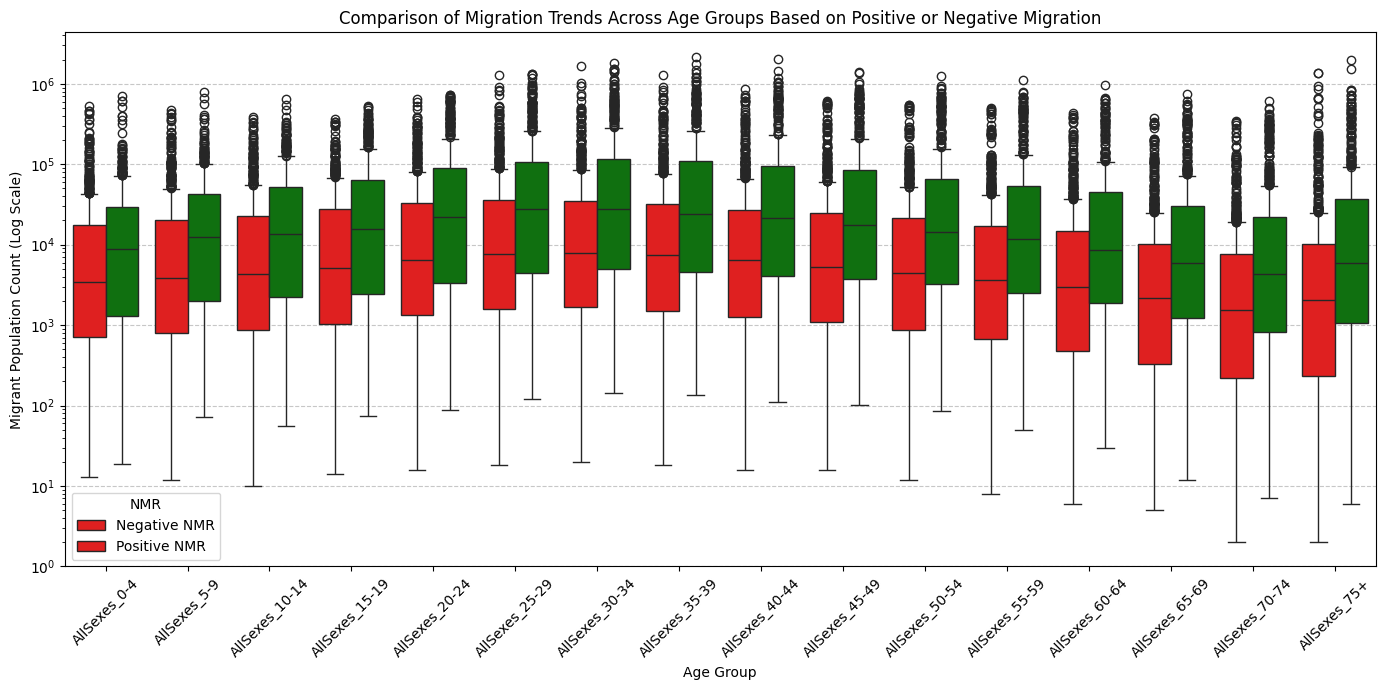

In [127]:
# Convert age group columns to numeric
age_columns = [
    "AllSexes_0-4", "AllSexes_5-9", "AllSexes_10-14", "AllSexes_15-19",
    "AllSexes_20-24", "AllSexes_25-29", "AllSexes_30-34", "AllSexes_35-39",
    "AllSexes_40-44", "AllSexes_45-49", "AllSexes_50-54", "AllSexes_55-59",
    "AllSexes_60-64", "AllSexes_65-69", "AllSexes_70-74", "AllSexes_75+"
]

final_merged_df[age_columns] = final_merged_df[age_columns].apply(pd.to_numeric, errors="coerce")

# Melt the dataset to have Age Groups as a single column
melted_df = final_merged_df.melt(
    id_vars=["NMR_Target"], value_vars=age_columns, var_name="Age_Group", value_name="Migrant_Count"
)

# Create a boxplot to compare migration trends across age groups with log scale
plt.figure(figsize=(14, 7))
sns.boxplot(
    x="Age_Group",
    y="Migrant_Count",
    hue="NMR_Target",
    data=melted_df,
    palette={0: "red", 1: "green"}  # Assign distinct colors for 0 and 1
)
plt.yscale("log")  # Apply log scale to the y-axis
plt.xticks(rotation=45)
plt.xlabel("Age Group")
plt.ylabel("Migrant Population Count (Log Scale)")
plt.title("Comparison of Migration Trends Across Age Groups Based on Positive or Negative Migration")
plt.legend(title="NMR", labels=["Negative NMR", "Positive NMR"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1400x700 with 0 Axes>

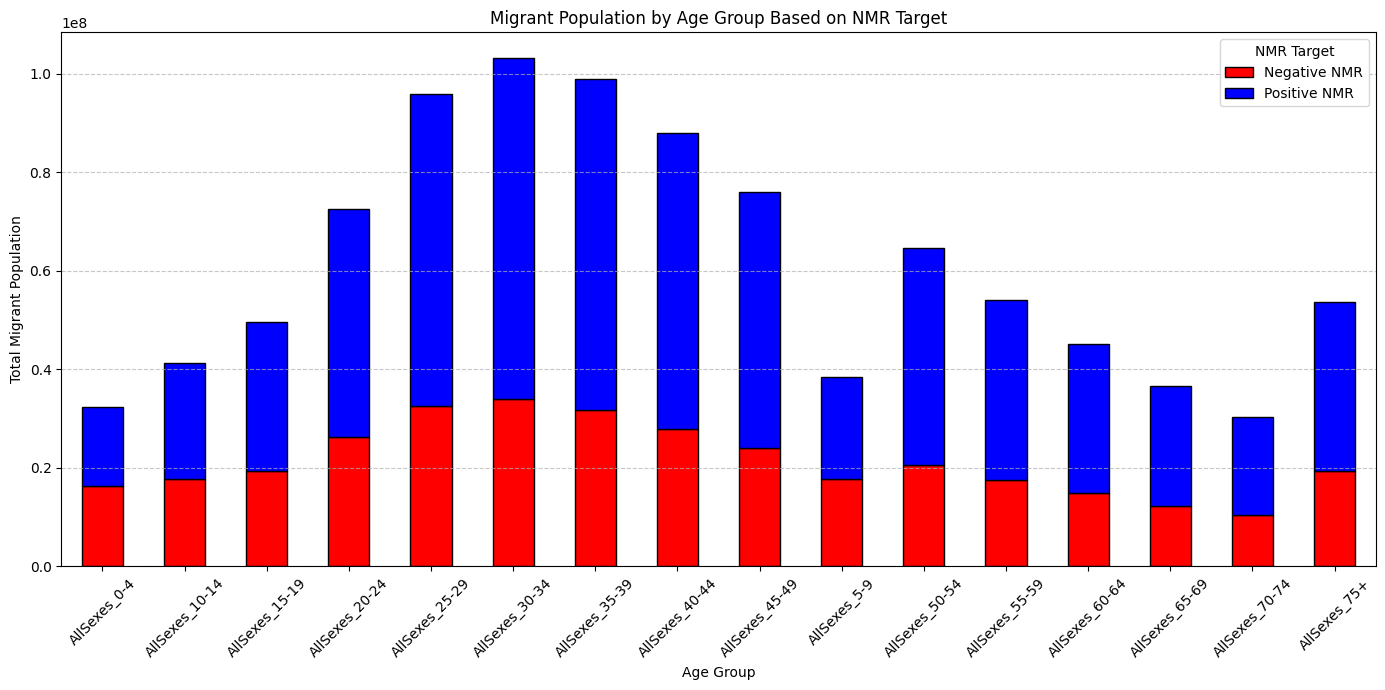

In [108]:
# Aggregate data by Age Group and NMR_Target
stacked_data = melted_df.groupby(["Age_Group", "NMR_Target"])["Migrant_Count"].sum().unstack()

# Plot Stacked Bar Chart
plt.figure(figsize=(14, 7))
stacked_data.plot(kind="bar", stacked=True, color=["red", "blue"], edgecolor="black", figsize=(14, 7))
plt.title("Migrant Population by Age Group Based on NMR Target")
plt.xlabel("Age Group")
plt.ylabel("Total Migrant Population")
plt.xticks(rotation=45)
plt.legend(title="NMR Target", labels=["Negative NMR", "Positive NMR"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

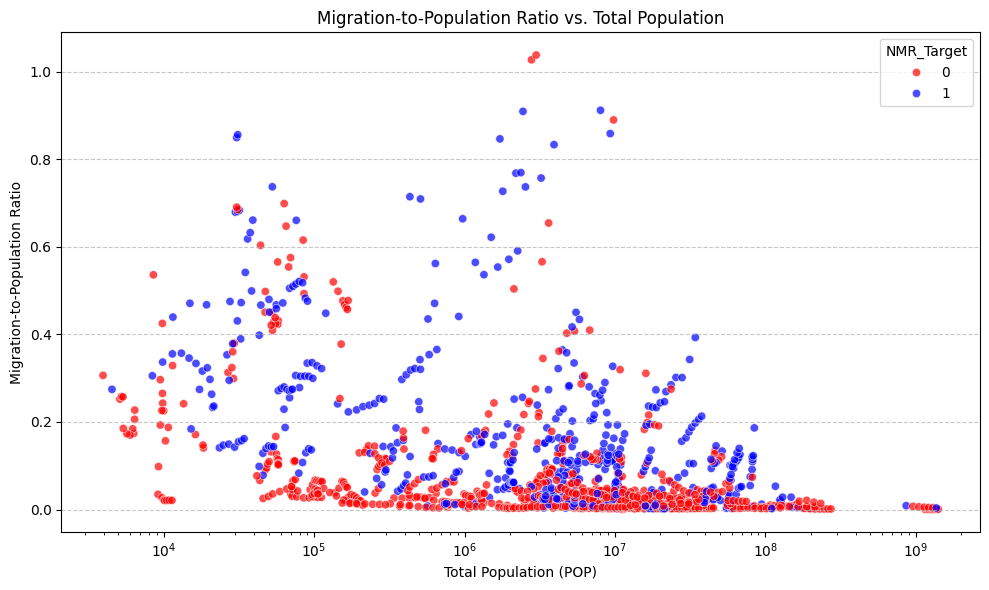

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure necessary columns are numeric
final_merged_df["POP"] = pd.to_numeric(final_merged_df["POP"], errors="coerce")
final_merged_df["Migration_to_Population_Ratio"] = pd.to_numeric(
    final_merged_df["Migration_to_Population_Ratio"], errors="coerce"
)

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=final_merged_df,
    x="POP",
    y="Migration_to_Population_Ratio",
    hue="NMR_Target",
    palette={0: "red", 1: "blue"},
    alpha=0.7
)

# Add plot labels and title
plt.title("Migration-to-Population Ratio vs. Total Population")
plt.xlabel("Total Population (POP)")
plt.ylabel("Migration-to-Population Ratio")
plt.xscale("log")  # Use a log scale for better visualization of wide population range
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()